In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import os
from natsort import natsorted
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import *

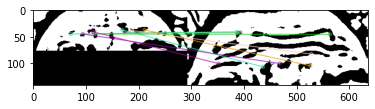

(<matplotlib.image.AxesImage at 0x2179adab6a0>, None)

In [18]:
# read images
img1 = cv2.imread('C:/SIFT/forhead/s1/1_P1_S1_1.jpg')  
img2 = cv2.imread('C:/SIFT/forhead/s2/1_P1_S2_1.jpg') 
#feature enhancement
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.GaussianBlur(img1,(5,5),2)
img1 = cv2.medianBlur(img1,3) 
img1 = cv2.bilateralFilter(img1,7,100,100)
img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.GaussianBlur(img2,(5,5),2)
img2 = cv2.medianBlur(img2,3)
img2 = cv2.bilateralFilter(img2,7,100,100) 
img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
#sift
orb = cv2.ORB_create()
keypoints_1, descriptors_1 = orb.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = orb.detectAndCompute(img2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [2]:
file1 = open("orb.txt", "w")
path1 = 'C:/SIFT/forhead/s1'
path2 = 'C:/SIFT/forhead/s2'

orb= cv2.ORB_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    #performing normalization of the images data min max normailzation
    img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.GaussianBlur(img1,(5,5),2)
    img1 = cv2.medianBlur(img1,3) 
    img1 = cv2.bilateralFilter(img1,7,100,100)
    img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
    # detect and compute keypoints and descriptors
    img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    kp1, des1 = orb.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in natsorted(os.listdir(path2)):
            img2 = os.path.join(path2, image)
        #print(img2)
            str2 = str(image)
            if (img1 != img2): # queryImage
                img2 = cv2.imread(img2) # trainImage
                img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
                kp2, des2 = orb.detectAndCompute(img2,None)
                if len(kp2) == 0:
                    continue
                matches = bf.knnMatch(des1,des2, k=2)
                dis = bf.match(des1,des2)
            #----------------------------------------------
                number_keypoints = 0
                if len(kp1) <= len(kp2):
                    number_keypoints = len(kp1)
                else:
                    number_keypoints = len(kp2)
                good = []
                for v in matches:
                    if len(v) < 2:
                        continue
                    else:
                        m,n = v
                        if m.distance < 0.7*n.distance:
                            good.append([m])
                #print("Keypoints 1ST Image: " + str(len(kp1)))
                #print("Keypoints 2ND Image: " + str(len(kp2)))
                #print("GOOD Matches:", len(good))
                score = len(good) / number_keypoints
                #print("How good it's the match: ", score) #* 100, "%")
                file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                print(str1 + " " + str2 + " " + str(score)) # replace with 'cos' if using cosine similarity
file1.close()

C:\Users\Ishu\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 3_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 4_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 4_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 5_P2_S2_1.jpg 0.0
1_P1_S1_1.jpg 5_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 5_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 6_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0
1_P1_S1_

1_P1_S1_2.jpg 15_P2_S2_2.jpg 0.0
1_P1_S1_2.jpg 15_P2_S2_3.jpg 0.011363636363636364
1_P1_S1_2.jpg 16_P1_S2_1.jpg 0.007575757575757576
1_P1_S1_2.jpg 16_P1_S2_2.jpg 0.0
1_P1_S1_2.jpg 16_P1_S2_3.jpg 0.03773584905660377
1_P1_S1_2.jpg 16_P2_S2_1.jpg 0.05
1_P1_S1_2.jpg 16_P2_S2_2.jpg 0.10714285714285714
1_P1_S1_2.jpg 16_P2_S2_3.jpg 0.017699115044247787
1_P1_S1_2.jpg 17_P1_S2_1.jpg 0.005128205128205128
1_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0
1_P1_S1_2.jpg 17_P1_S2_3.jpg 0.002564102564102564
1_P1_S1_2.jpg 17_P2_S2_1.jpg 0.2222222222222222
1_P1_S1_2.jpg 17_P2_S2_2.jpg 0.125
1_P1_S1_2.jpg 17_P2_S2_3.jpg 0.1
1_P1_S1_2.jpg 18_P1_S2_1.jpg 0.005128205128205128
1_P1_S1_2.jpg 18_P1_S2_2.jpg 0.002564102564102564
1_P1_S1_2.jpg 18_P1_S2_3.jpg 0.0
1_P1_S1_2.jpg 18_P2_S2_1.jpg 0.0
1_P1_S1_2.jpg 18_P2_S2_2.jpg 0.00796812749003984
1_P1_S1_2.jpg 18_P2_S2_3.jpg 0.0
1_P1_S1_2.jpg 20_P1_S2_2.jpg 0.75
1_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
1_P1_S1_2.jpg 21_P1_S2_2.jpg 0.002564102564102564
1_P1_S1_2.jpg 21_P1_S2_3.jpg 0.0025641

1_P1_S1_3.jpg 27_P1_S2_3.jpg 0.0
1_P1_S1_3.jpg 27_P2_S2_1.jpg 0.0
1_P1_S1_3.jpg 27_P2_S2_2.jpg 0.0
1_P1_S1_3.jpg 27_P2_S2_3.jpg 0.0
1_P1_S1_3.jpg 28_P1_S2_1.jpg 0.045454545454545456
1_P1_S1_3.jpg 28_P1_S2_2.jpg 0.01639344262295082
1_P1_S1_3.jpg 28_P1_S2_3.jpg 0.0
1_P1_S1_3.jpg 28_P2_S2_1.jpg 0.0
1_P1_S1_3.jpg 28_P2_S2_2.jpg 0.018867924528301886
1_P1_S1_3.jpg 28_P2_S2_3.jpg 0.06666666666666667
1_P2_S1_1.jpg 1_P1_S2_1.jpg 0.0
1_P2_S1_1.jpg 1_P1_S2_2.jpg 0.0
1_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0
1_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
1_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0
1_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0
1_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0
1_P2_S1_1.jpg 2_P1_S2_2.jpg 0.0
1_P2_S1_1.jpg 2_P1_S2_3.jpg 0.0
1_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0
1_P2_S1_1.jpg 2_P2_S2_2.jpg 0.0
1_P2_S1_1.jpg 2_P2_S2_3.jpg 0.0
1_P2_S1_1.jpg 3_P1_S2_1.jpg 0.0
1_P2_S1_1.jpg 3_P1_S2_2.jpg 0.0
1_P2_S1_1.jpg 3_P1_S2_3.jpg 0.0
1_P2_S1_1.jpg 3_P2_S2_1.jpg 0.0
1_P2_S1_1.jpg 3_P2_S2_2.jpg 0.0
1_P2_S1_1.jpg 3_P2_S2_3.jpg 0.0
1_P2_S1_1.jpg 4_P1_S2_1.jpg 

1_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 16_P1_S2_2.jpg 0.0
1_P2_S1_2.jpg 16_P1_S2_3.jpg 0.0
1_P2_S1_2.jpg 16_P2_S2_1.jpg 0.05
1_P2_S1_2.jpg 16_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 16_P2_S2_3.jpg 0.015151515151515152
1_P2_S1_2.jpg 17_P1_S2_1.jpg 0.015151515151515152
1_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
1_P2_S1_2.jpg 17_P1_S2_3.jpg 0.015151515151515152
1_P2_S1_2.jpg 17_P2_S2_1.jpg 0.1111111111111111
1_P2_S1_2.jpg 17_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 17_P2_S2_3.jpg 0.05
1_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 18_P1_S2_2.jpg 0.015151515151515152
1_P2_S1_2.jpg 18_P1_S2_3.jpg 0.030303030303030304
1_P2_S1_2.jpg 18_P2_S2_1.jpg 0.0
1_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 18_P2_S2_3.jpg 0.015151515151515152
1_P2_S1_2.jpg 20_P1_S2_2.jpg 0.25
1_P2_S1_2.jpg 21_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 21_P1_S2_2.jpg 0.0
1_P2_S1_2.jpg 21_P1_S2_3.jpg 0.0
1_P2_S1_2.jpg 21_P2_S2_1.jpg 0.0
1_P2_S1_2.jpg 21_P2_S2_2.jpg 0.0
1_P2_S1_2.jpg 21_P2_S2_3.jpg 0.0
1_P2_S1_2.jpg 22_P1_S2_1.jpg 0.0
1_P2_S1_2.jpg 22_P1_S2

2_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
2_P1_S1_1.jpg 4_P2_S2_3.jpg 0.0
2_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
2_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
2_P1_S1_1.jpg 5_P1_S2_3.jpg 0.3076923076923077
2_P1_S1_1.jpg 5_P2_S2_1.jpg 0.02040816326530612
2_P1_S1_1.jpg 5_P2_S2_2.jpg 0.0
2_P1_S1_1.jpg 5_P2_S2_3.jpg 0.125
2_P1_S1_1.jpg 6_P1_S2_1.jpg 0.0
2_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0
2_P1_S1_1.jpg 6_P1_S2_3.jpg 0.0
2_P1_S1_1.jpg 6_P2_S2_1.jpg 0.007518796992481203
2_P1_S1_1.jpg 6_P2_S2_2.jpg 0.038461538461538464
2_P1_S1_1.jpg 7_P1_S2_1.jpg 0.0
2_P1_S1_1.jpg 7_P1_S2_2.jpg 0.0
2_P1_S1_1.jpg 7_P1_S2_3.jpg 0.0
2_P1_S1_1.jpg 7_P2_S2_1.jpg 0.010309278350515464
2_P1_S1_1.jpg 7_P2_S2_2.jpg 0.0
2_P1_S1_1.jpg 7_P2_S2_3.jpg 0.005154639175257732
2_P1_S1_1.jpg 8_P1_S2_1.jpg 0.016129032258064516
2_P1_S1_1.jpg 8_P1_S2_2.jpg 0.0
2_P1_S1_1.jpg 8_P1_S2_3.jpg 0.0
2_P1_S1_1.jpg 8_P2_S2_1.jpg 0.009708737864077669
2_P1_S1_1.jpg 8_P2_S2_2.jpg 0.005988023952095809
2_P1_S1_1.jpg 8_P2_S2_3.jpg 0.017241379310344827
2_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0

2_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 17_P1_S2_3.jpg 0.0
2_P1_S1_2.jpg 17_P2_S2_1.jpg 0.0
2_P1_S1_2.jpg 17_P2_S2_2.jpg 0.0
2_P1_S1_2.jpg 17_P2_S2_3.jpg 0.0
2_P1_S1_2.jpg 18_P1_S2_1.jpg 0.0
2_P1_S1_2.jpg 18_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 18_P1_S2_3.jpg 0.0
2_P1_S1_2.jpg 18_P2_S2_1.jpg 0.0
2_P1_S1_2.jpg 18_P2_S2_2.jpg 0.023809523809523808
2_P1_S1_2.jpg 18_P2_S2_3.jpg 0.0
2_P1_S1_2.jpg 20_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
2_P1_S1_2.jpg 21_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 21_P1_S2_3.jpg 0.0
2_P1_S1_2.jpg 21_P2_S2_1.jpg 0.0
2_P1_S1_2.jpg 21_P2_S2_2.jpg 0.023809523809523808
2_P1_S1_2.jpg 21_P2_S2_3.jpg 0.0
2_P1_S1_2.jpg 22_P1_S2_1.jpg 0.0
2_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
2_P1_S1_2.jpg 22_P1_S2_3.jpg 0.0
2_P1_S1_2.jpg 22_P2_S2_1.jpg 0.3333333333333333
2_P1_S1_2.jpg 22_P2_S2_3.jpg 0.25
2_P1_S1_2.jpg 23_P1_S2_1.jpg 0.0
2_P1_S1_2.jpg 23_P1_S2_2.jpg 0.1111111111111111
2_P1_S1_2.jpg 23_P1_S2_3.jpg 0.6666666666666666
2_P1_S1_2.jpg 23_P2_S2_1.jpg 1.0
2_P1_S1_2.jpg 23_P2_S2_2.jpg 

2_P2_S1_1.jpg 6_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
2_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 7_P1_S2_2.jpg 0.0
2_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
2_P2_S1_1.jpg 7_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 7_P2_S2_2.jpg 0.0
2_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 8_P1_S2_2.jpg 0.0
2_P2_S1_1.jpg 8_P1_S2_3.jpg 0.0
2_P2_S1_1.jpg 8_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 8_P2_S2_2.jpg 0.0
2_P2_S1_1.jpg 8_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
2_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
2_P2_S1_1.jpg 9_P2_S2_1.jpg 0.125
2_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0
2_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 10_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0
2_P2_S1_1.jpg 10_P1_S2_3.jpg 0.0
2_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
2_P2_S1_1.jpg 10_P2_S2_3.jpg 0.0
2_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
2_P2_S1_1.jpg 11_P1_S2_2.jpg 0.0
2_P2_S1_1.jpg 11_P1_S2_3.jpg 0.0
2_P2_S1_1.jpg 11_P2_S2_1.jpg 0.0
2_P2_S1_1.jpg 11_P2_S2_2.jpg

2_P2_S1_2.jpg 23_P2_S2_2.jpg 0.0
2_P2_S1_2.jpg 23_P2_S2_3.jpg 0.03225806451612903
2_P2_S1_2.jpg 24_P1_S2_1.jpg 0.0
2_P2_S1_2.jpg 24_P1_S2_2.jpg 0.0
2_P2_S1_2.jpg 24_P1_S2_3.jpg 0.0
2_P2_S1_2.jpg 24_P2_S2_1.jpg 0.0
2_P2_S1_2.jpg 24_P2_S2_2.jpg 0.005319148936170213
2_P2_S1_2.jpg 24_P2_S2_3.jpg 0.0
2_P2_S1_2.jpg 25_P1_S2_1.jpg 0.0
2_P2_S1_2.jpg 25_P1_S2_2.jpg 0.010638297872340425
2_P2_S1_2.jpg 25_P1_S2_3.jpg 0.017857142857142856
2_P2_S1_2.jpg 25_P2_S2_1.jpg 1.0
2_P2_S1_2.jpg 25_P2_S2_2.jpg 0.0
2_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0
2_P2_S1_2.jpg 26_P1_S2_1.jpg 0.0
2_P2_S1_2.jpg 26_P1_S2_2.jpg 0.0
2_P2_S1_2.jpg 26_P1_S2_3.jpg 0.0
2_P2_S1_2.jpg 26_P2_S2_1.jpg 0.0
2_P2_S1_2.jpg 26_P2_S2_2.jpg 0.0
2_P2_S1_2.jpg 26_P2_S2_3.jpg 0.0
2_P2_S1_2.jpg 27_P1_S2_1.jpg 0.016666666666666666
2_P2_S1_2.jpg 27_P1_S2_2.jpg 0.019230769230769232
2_P2_S1_2.jpg 27_P1_S2_3.jpg 0.0
2_P2_S1_2.jpg 27_P2_S2_1.jpg 0.0
2_P2_S1_2.jpg 27_P2_S2_2.jpg 0.0
2_P2_S1_2.jpg 27_P2_S2_3.jpg 0.1111111111111111
2_P2_S1_2.jpg 28_P1_S2_1.j

3_P1_S1_1.jpg 11_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 11_P1_S2_3.jpg 0.0
3_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 11_P2_S2_2.jpg 0.0
3_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
3_P1_S1_1.jpg 12_P1_S2_1.jpg 0.0
3_P1_S1_1.jpg 12_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 12_P1_S2_3.jpg 0.0
3_P1_S1_1.jpg 12_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 12_P2_S2_2.jpg 0.0
3_P1_S1_1.jpg 12_P2_S2_3.jpg 0.0
3_P1_S1_1.jpg 13_P1_S2_1.jpg 0.0
3_P1_S1_1.jpg 13_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 13_P1_S2_3.jpg 0.0
3_P1_S1_1.jpg 13_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 14_P1_S2_1.jpg 0.0
3_P1_S1_1.jpg 14_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 14_P1_S2_3.jpg 0.0
3_P1_S1_1.jpg 14_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 14_P2_S2_2.jpg 0.0
3_P1_S1_1.jpg 14_P2_S2_3.jpg 0.0
3_P1_S1_1.jpg 15_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 15_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 15_P2_S2_2.jpg 0.0
3_P1_S1_1.jpg 15_P2_S2_3.jpg 0.0
3_P1_S1_1.jpg 16_P1_S2_1.jpg 0.0
3_P1_S1_1.jpg 16_P1_S2_2.jpg 0.0
3_P1_S1_1.jpg 16_P1_S2_3.jpg 0.0
3_P1_S1_1.jpg 16_P2_S2_1.jpg 0.0
3_P1_S1_1.jpg 16_P2_S2_2.jpg 0.0
3_P1_S1_1.

3_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0
3_P1_S1_3.jpg 3_P1_S2_2.jpg 0.0
3_P1_S1_3.jpg 3_P1_S2_3.jpg 0.0
3_P1_S1_3.jpg 3_P2_S2_1.jpg 0.0
3_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0
3_P1_S1_3.jpg 3_P2_S2_3.jpg 0.03125
3_P1_S1_3.jpg 4_P1_S2_1.jpg 0.03125
3_P1_S1_3.jpg 4_P1_S2_3.jpg 0.0
3_P1_S1_3.jpg 4_P2_S2_1.jpg 0.0
3_P1_S1_3.jpg 4_P2_S2_2.jpg 0.0
3_P1_S1_3.jpg 4_P2_S2_3.jpg 0.0
3_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
3_P1_S1_3.jpg 5_P1_S2_2.jpg 0.0
3_P1_S1_3.jpg 5_P1_S2_3.jpg 0.07692307692307693
3_P1_S1_3.jpg 5_P2_S2_1.jpg 0.0
3_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0
3_P1_S1_3.jpg 5_P2_S2_3.jpg 0.0
3_P1_S1_3.jpg 6_P1_S2_1.jpg 0.0
3_P1_S1_3.jpg 6_P1_S2_2.jpg 0.0
3_P1_S1_3.jpg 6_P1_S2_3.jpg 0.0
3_P1_S1_3.jpg 6_P2_S2_1.jpg 0.0
3_P1_S1_3.jpg 6_P2_S2_2.jpg 0.0
3_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0
3_P1_S1_3.jpg 7_P1_S2_2.jpg 0.0
3_P1_S1_3.jpg 7_P1_S2_3.jpg 0.03125
3_P1_S1_3.jpg 7_P2_S2_1.jpg 0.0
3_P1_S1_3.jpg 7_P2_S2_2.jpg 0.0
3_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0
3_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0
3_P1_S1_3.jpg 8_P1_S2_2.jpg 0.0
3_P1_S1_3.jp

3_P2_S1_1.jpg 21_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 22_P1_S2_1.jpg 0.0
3_P2_S1_1.jpg 22_P1_S2_2.jpg 0.0
3_P2_S1_1.jpg 22_P1_S2_3.jpg 0.0
3_P2_S1_1.jpg 22_P2_S2_1.jpg 0.0
3_P2_S1_1.jpg 22_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 23_P1_S2_1.jpg 0.0
3_P2_S1_1.jpg 23_P1_S2_2.jpg 0.0
3_P2_S1_1.jpg 23_P1_S2_3.jpg 0.0
3_P2_S1_1.jpg 23_P2_S2_1.jpg 0.0
3_P2_S1_1.jpg 23_P2_S2_2.jpg 0.0
3_P2_S1_1.jpg 23_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 24_P1_S2_1.jpg 0.0
3_P2_S1_1.jpg 24_P1_S2_2.jpg 0.0
3_P2_S1_1.jpg 24_P1_S2_3.jpg 0.0
3_P2_S1_1.jpg 24_P2_S2_1.jpg 0.0
3_P2_S1_1.jpg 24_P2_S2_2.jpg 0.0
3_P2_S1_1.jpg 24_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 25_P1_S2_1.jpg 0.0
3_P2_S1_1.jpg 25_P1_S2_2.jpg 0.0
3_P2_S1_1.jpg 25_P1_S2_3.jpg 0.0
3_P2_S1_1.jpg 25_P2_S2_1.jpg 0.0
3_P2_S1_1.jpg 25_P2_S2_2.jpg 0.0
3_P2_S1_1.jpg 25_P2_S2_3.jpg 0.0
3_P2_S1_1.jpg 26_P1_S2_1.jpg 0.0
3_P2_S1_1.jpg 26_P1_S2_2.jpg 0.0
3_P2_S1_1.jpg 26_P1_S2_3.jpg 0.0
3_P2_S1_1.jpg 26_P2_S2_1.jpg 0.0
3_P2_S1_1.jpg 26_P2_S2_2.jpg 0.25
3_P2_S1_1.jpg 26_P2_S2_3.jpg 0.0
3_P2_S1_1

3_P2_S1_3.jpg 11_P1_S2_1.jpg 0.0
3_P2_S1_3.jpg 11_P1_S2_2.jpg 0.10526315789473684
3_P2_S1_3.jpg 11_P1_S2_3.jpg 0.2857142857142857
3_P2_S1_3.jpg 11_P2_S2_1.jpg 0.0
3_P2_S1_3.jpg 11_P2_S2_2.jpg 0.0
3_P2_S1_3.jpg 11_P2_S2_3.jpg 0.0
3_P2_S1_3.jpg 12_P1_S2_1.jpg 0.0
3_P2_S1_3.jpg 12_P1_S2_2.jpg 0.009345794392523364
3_P2_S1_3.jpg 12_P1_S2_3.jpg 0.0
3_P2_S1_3.jpg 12_P2_S2_1.jpg 0.0
3_P2_S1_3.jpg 12_P2_S2_2.jpg 0.0
3_P2_S1_3.jpg 12_P2_S2_3.jpg 0.0
3_P2_S1_3.jpg 13_P1_S2_1.jpg 0.0
3_P2_S1_3.jpg 13_P1_S2_2.jpg 0.2
3_P2_S1_3.jpg 13_P1_S2_3.jpg 0.6
3_P2_S1_3.jpg 13_P2_S2_1.jpg 0.0
3_P2_S1_3.jpg 14_P1_S2_1.jpg 0.0
3_P2_S1_3.jpg 14_P1_S2_2.jpg 0.009345794392523364
3_P2_S1_3.jpg 14_P1_S2_3.jpg 0.018691588785046728
3_P2_S1_3.jpg 14_P2_S2_1.jpg 0.04878048780487805
3_P2_S1_3.jpg 14_P2_S2_2.jpg 0.0
3_P2_S1_3.jpg 14_P2_S2_3.jpg 0.0
3_P2_S1_3.jpg 15_P1_S2_2.jpg 0.0
3_P2_S1_3.jpg 15_P2_S2_1.jpg 0.0
3_P2_S1_3.jpg 15_P2_S2_2.jpg 0.017543859649122806
3_P2_S1_3.jpg 15_P2_S2_3.jpg 0.0
3_P2_S1_3.jpg 16_P1_S2_1.jp

4_P1_S1_2.jpg 1_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 1_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 1_P1_S2_3.jpg 0.0
4_P1_S1_2.jpg 1_P2_S2_1.jpg 0.0
4_P1_S1_2.jpg 1_P2_S2_2.jpg 0.0
4_P1_S1_2.jpg 1_P2_S2_3.jpg 0.1111111111111111
4_P1_S1_2.jpg 2_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 2_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 2_P1_S2_3.jpg 0.0
4_P1_S1_2.jpg 2_P2_S2_1.jpg 0.0
4_P1_S1_2.jpg 2_P2_S2_2.jpg 0.0
4_P1_S1_2.jpg 2_P2_S2_3.jpg 0.0
4_P1_S1_2.jpg 3_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 3_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 3_P1_S2_3.jpg 0.0
4_P1_S1_2.jpg 3_P2_S2_1.jpg 0.0
4_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0
4_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0
4_P1_S1_2.jpg 4_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 4_P1_S2_3.jpg 0.0
4_P1_S1_2.jpg 4_P2_S2_1.jpg 0.0
4_P1_S1_2.jpg 4_P2_S2_2.jpg 0.0
4_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0
4_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 5_P1_S2_2.jpg 0.0
4_P1_S1_2.jpg 5_P1_S2_3.jpg 0.0
4_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0
4_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0
4_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0
4_P1_S1_2.jpg 6_P1_S2_1.jpg 0.0
4_P1_S1_2.jpg 6_P1_S2_2.j

4_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
4_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
4_P1_S1_3.jpg 18_P2_S2_2.jpg 0.041666666666666664
4_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
4_P1_S1_3.jpg 20_P1_S2_2.jpg 0.0
4_P1_S1_3.jpg 21_P1_S2_1.jpg 0.0
4_P1_S1_3.jpg 21_P1_S2_2.jpg 0.0
4_P1_S1_3.jpg 21_P1_S2_3.jpg 0.0
4_P1_S1_3.jpg 21_P2_S2_1.jpg 0.0
4_P1_S1_3.jpg 21_P2_S2_2.jpg 0.0
4_P1_S1_3.jpg 21_P2_S2_3.jpg 0.0
4_P1_S1_3.jpg 22_P1_S2_1.jpg 0.041666666666666664
4_P1_S1_3.jpg 22_P1_S2_2.jpg 0.0
4_P1_S1_3.jpg 22_P1_S2_3.jpg 0.0
4_P1_S1_3.jpg 22_P2_S2_1.jpg 0.0
4_P1_S1_3.jpg 22_P2_S2_3.jpg 0.0
4_P1_S1_3.jpg 23_P1_S2_1.jpg 0.0
4_P1_S1_3.jpg 23_P1_S2_2.jpg 0.0
4_P1_S1_3.jpg 23_P1_S2_3.jpg 0.16666666666666666
4_P1_S1_3.jpg 23_P2_S2_1.jpg 0.16666666666666666
4_P1_S1_3.jpg 23_P2_S2_2.jpg 0.0
4_P1_S1_3.jpg 23_P2_S2_3.jpg 0.0
4_P1_S1_3.jpg 24_P1_S2_1.jpg 0.0
4_P1_S1_3.jpg 24_P1_S2_2.jpg 0.0
4_P1_S1_3.jpg 24_P1_S2_3.jpg 0.0
4_P1_S1_3.jpg 24_P2_S2_1.jpg 0.0
4_P1_S1_3.jpg 24_P2_S2_2.jpg 0.0
4_P1_S1_3.jpg 24_P2_S2_3.jpg 0.0
4_P1_S1_3.

4_P2_S1_2.jpg 7_P1_S2_3.jpg 0.0
4_P2_S1_2.jpg 7_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 7_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 7_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 8_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 8_P1_S2_2.jpg 0.0
4_P2_S1_2.jpg 8_P1_S2_3.jpg 0.0
4_P2_S1_2.jpg 8_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 8_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 9_P1_S2_2.jpg 0.0
4_P2_S1_2.jpg 9_P1_S2_3.jpg 0.0
4_P2_S1_2.jpg 9_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 9_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 10_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 10_P1_S2_2.jpg 0.0
4_P2_S1_2.jpg 10_P1_S2_3.jpg 0.0
4_P2_S1_2.jpg 10_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 10_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 11_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 11_P1_S2_2.jpg 0.0
4_P2_S1_2.jpg 11_P1_S2_3.jpg 0.0
4_P2_S1_2.jpg 11_P2_S2_1.jpg 0.0
4_P2_S1_2.jpg 11_P2_S2_2.jpg 0.0
4_P2_S1_2.jpg 11_P2_S2_3.jpg 0.0
4_P2_S1_2.jpg 12_P1_S2_1.jpg 0.0
4_P2_S1_2.jpg 12_P1_S2_2.jpg 0.0
4_P2_S1_2.jpg 12_P1_S2_3.j

4_P2_S1_3.jpg 27_P1_S2_1.jpg 0.0
4_P2_S1_3.jpg 27_P1_S2_2.jpg 0.0
4_P2_S1_3.jpg 27_P1_S2_3.jpg 0.0
4_P2_S1_3.jpg 27_P2_S2_1.jpg 0.0
4_P2_S1_3.jpg 27_P2_S2_2.jpg 0.0
4_P2_S1_3.jpg 27_P2_S2_3.jpg 0.0
4_P2_S1_3.jpg 28_P1_S2_1.jpg 0.0
4_P2_S1_3.jpg 28_P1_S2_2.jpg 0.0
4_P2_S1_3.jpg 28_P1_S2_3.jpg 0.0
4_P2_S1_3.jpg 28_P2_S2_1.jpg 0.0
4_P2_S1_3.jpg 28_P2_S2_2.jpg 0.0
4_P2_S1_3.jpg 28_P2_S2_3.jpg 0.0
5_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
5_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
5_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
5_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0
5_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
5_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
5_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
5_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
5_P1_S1_1.jpg 2_P1_S2_3.jpg 0.0
5_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
5_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
5_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
5_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
5_P1_S1_1.jpg 3_P1_S2_2.jpg 0.0
5_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
5_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
5_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
5_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
5_P1_S1_1.jpg 4_P1_S2_1.jpg 

5_P1_S1_2.jpg 16_P1_S2_3.jpg 0.0
5_P1_S1_2.jpg 16_P2_S2_1.jpg 0.025
5_P1_S1_2.jpg 16_P2_S2_2.jpg 0.07142857142857142
5_P1_S1_2.jpg 16_P2_S2_3.jpg 0.0
5_P1_S1_2.jpg 17_P1_S2_1.jpg 0.004424778761061947
5_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0
5_P1_S1_2.jpg 17_P1_S2_3.jpg 0.0
5_P1_S1_2.jpg 17_P2_S2_1.jpg 0.1111111111111111
5_P1_S1_2.jpg 17_P2_S2_2.jpg 0.0
5_P1_S1_2.jpg 17_P2_S2_3.jpg 0.1
5_P1_S1_2.jpg 18_P1_S2_1.jpg 0.0
5_P1_S1_2.jpg 18_P1_S2_2.jpg 0.0
5_P1_S1_2.jpg 18_P1_S2_3.jpg 0.01327433628318584
5_P1_S1_2.jpg 18_P2_S2_1.jpg 0.0
5_P1_S1_2.jpg 18_P2_S2_2.jpg 0.0
5_P1_S1_2.jpg 18_P2_S2_3.jpg 0.004424778761061947
5_P1_S1_2.jpg 20_P1_S2_2.jpg 0.75
5_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
5_P1_S1_2.jpg 21_P1_S2_2.jpg 0.0
5_P1_S1_2.jpg 21_P1_S2_3.jpg 0.004424778761061947
5_P1_S1_2.jpg 21_P2_S2_1.jpg 0.0
5_P1_S1_2.jpg 21_P2_S2_2.jpg 0.0
5_P1_S1_2.jpg 21_P2_S2_3.jpg 0.0
5_P1_S1_2.jpg 22_P1_S2_1.jpg 0.0
5_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
5_P1_S1_2.jpg 22_P1_S2_3.jpg 0.0
5_P1_S1_2.jpg 22_P2_S2_1.jpg 1.6666666666

5_P1_S1_3.jpg 28_P2_S2_1.jpg 0.02702702702702703
5_P1_S1_3.jpg 28_P2_S2_2.jpg 0.0
5_P1_S1_3.jpg 28_P2_S2_3.jpg 0.06666666666666667
5_P2_S1_1.jpg 1_P1_S2_1.jpg 0.017857142857142856
5_P2_S1_1.jpg 1_P1_S2_2.jpg 0.0
5_P2_S1_1.jpg 1_P1_S2_3.jpg 0.015625
5_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
5_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0
5_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0
5_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0
5_P2_S1_1.jpg 2_P1_S2_2.jpg 0.0
5_P2_S1_1.jpg 2_P1_S2_3.jpg 0.03225806451612903
5_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0
5_P2_S1_1.jpg 2_P2_S2_2.jpg 0.015625
5_P2_S1_1.jpg 2_P2_S2_3.jpg 0.0
5_P2_S1_1.jpg 3_P1_S2_1.jpg 0.03125
5_P2_S1_1.jpg 3_P1_S2_2.jpg 0.2
5_P2_S1_1.jpg 3_P1_S2_3.jpg 0.0
5_P2_S1_1.jpg 3_P2_S2_1.jpg 0.015625
5_P2_S1_1.jpg 3_P2_S2_2.jpg 0.0
5_P2_S1_1.jpg 3_P2_S2_3.jpg 0.0
5_P2_S1_1.jpg 4_P1_S2_1.jpg 0.0
5_P2_S1_1.jpg 4_P1_S2_3.jpg 0.020833333333333332
5_P2_S1_1.jpg 4_P2_S2_1.jpg 0.0
5_P2_S1_1.jpg 4_P2_S2_2.jpg 0.0
5_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0
5_P2_S1_1.jpg 5_P1_S2_1.jpg 0.16666666666666666
5_P2_S1_1.jpg 5_

5_P2_S1_2.jpg 14_P1_S2_2.jpg 0.0
5_P2_S1_2.jpg 14_P1_S2_3.jpg 0.008064516129032258
5_P2_S1_2.jpg 14_P2_S2_1.jpg 0.0
5_P2_S1_2.jpg 14_P2_S2_2.jpg 0.0
5_P2_S1_2.jpg 14_P2_S2_3.jpg 0.0
5_P2_S1_2.jpg 15_P1_S2_2.jpg 0.0
5_P2_S1_2.jpg 15_P2_S2_1.jpg 0.0
5_P2_S1_2.jpg 15_P2_S2_2.jpg 0.0
5_P2_S1_2.jpg 15_P2_S2_3.jpg 0.0
5_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0
5_P2_S1_2.jpg 16_P1_S2_2.jpg 0.0
5_P2_S1_2.jpg 16_P1_S2_3.jpg 0.018867924528301886
5_P2_S1_2.jpg 16_P2_S2_1.jpg 0.025
5_P2_S1_2.jpg 16_P2_S2_2.jpg 0.03571428571428571
5_P2_S1_2.jpg 16_P2_S2_3.jpg 0.017699115044247787
5_P2_S1_2.jpg 17_P1_S2_1.jpg 0.0
5_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
5_P2_S1_2.jpg 17_P1_S2_3.jpg 0.0
5_P2_S1_2.jpg 17_P2_S2_1.jpg 0.1111111111111111
5_P2_S1_2.jpg 17_P2_S2_2.jpg 0.125
5_P2_S1_2.jpg 17_P2_S2_3.jpg 0.0
5_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
5_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
5_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0
5_P2_S1_2.jpg 18_P2_S2_1.jpg 0.0
5_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
5_P2_S1_2.jpg 18_P2_S2_3.jpg 0.0
5_P2_S1_2.jpg 20_P1_S2_

5_P2_S1_3.jpg 28_P2_S2_2.jpg 0.05660377358490566
5_P2_S1_3.jpg 28_P2_S2_3.jpg 0.06666666666666667
6_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
6_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
6_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0
6_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
6_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
6_P1_S1_1.jpg 2_P1_S2_3.jpg 0.0
6_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
6_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
6_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 3_P1_S2_2.jpg 0.0
6_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
6_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
6_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
6_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
6_P1_S1_1.jpg 4_P2_S2_1.jpg 0.0
6_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
6_P1_S1_1.jpg 4_P2_S2_3.jpg 0.1111111111111111
6_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
6_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
6_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
6_P1_S1_1.jpg 5_P2_S2_1.jpg 0.0
6_P1_S1_1.jpg 5_P2_S2_2

6_P1_S1_3.jpg 15_P1_S2_2.jpg 0.1111111111111111
6_P1_S1_3.jpg 15_P2_S2_1.jpg 0.022727272727272728
6_P1_S1_3.jpg 15_P2_S2_2.jpg 0.03508771929824561
6_P1_S1_3.jpg 15_P2_S2_3.jpg 0.0
6_P1_S1_3.jpg 16_P1_S2_1.jpg 0.030303030303030304
6_P1_S1_3.jpg 16_P1_S2_2.jpg 0.014925373134328358
6_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
6_P1_S1_3.jpg 16_P2_S2_1.jpg 0.025
6_P1_S1_3.jpg 16_P2_S2_2.jpg 0.07142857142857142
6_P1_S1_3.jpg 16_P2_S2_3.jpg 0.017699115044247787
6_P1_S1_3.jpg 17_P1_S2_1.jpg 0.0028328611898017
6_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0056657223796034
6_P1_S1_3.jpg 17_P1_S2_3.jpg 0.0
6_P1_S1_3.jpg 17_P2_S2_1.jpg 0.7777777777777778
6_P1_S1_3.jpg 17_P2_S2_2.jpg 0.375
6_P1_S1_3.jpg 17_P2_S2_3.jpg 0.0
6_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
6_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
6_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
6_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0028328611898017
6_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
6_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0028328611898017
6_P1_S1_3.jpg 20_P1_S2_2.jpg 0.5
6_P1_S1_3.jpg 21_P1_S2_1.jpg 0.0
6_P1_S1_3.jpg 

6_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0
6_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0
6_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
6_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0
6_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0
6_P2_S1_2.jpg 5_P2_S2_3.jpg 0.0
6_P2_S1_2.jpg 6_P1_S2_1.jpg 0.0
6_P2_S1_2.jpg 6_P1_S2_2.jpg 0.0
6_P2_S1_2.jpg 6_P1_S2_3.jpg 0.0
6_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0
6_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0
6_P2_S1_2.jpg 7_P1_S2_1.jpg 0.0
6_P2_S1_2.jpg 7_P1_S2_2.jpg 0.0
6_P2_S1_2.jpg 7_P1_S2_3.jpg 0.0
6_P2_S1_2.jpg 7_P2_S2_1.jpg 0.0
6_P2_S1_2.jpg 7_P2_S2_2.jpg 0.0
6_P2_S1_2.jpg 7_P2_S2_3.jpg 0.0
6_P2_S1_2.jpg 8_P1_S2_1.jpg 0.0
6_P2_S1_2.jpg 8_P1_S2_2.jpg 0.0
6_P2_S1_2.jpg 8_P1_S2_3.jpg 0.0
6_P2_S1_2.jpg 8_P2_S2_1.jpg 0.0
6_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0
6_P2_S1_2.jpg 8_P2_S2_3.jpg 0.0
6_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0
6_P2_S1_2.jpg 9_P1_S2_2.jpg 0.0
6_P2_S1_2.jpg 9_P1_S2_3.jpg 0.0
6_P2_S1_2.jpg 9_P2_S2_1.jpg 0.1111111111111111
6_P2_S1_2.jpg 9_P2_S2_2.jpg 0.0
6_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0
6_P2_S1_2.jpg 10_P1_S2_1.jpg 0.0
6_P2_S1_2.jpg 10_P1_S2_2

6_P2_S1_3.jpg 20_P1_S2_2.jpg 0.25
6_P2_S1_3.jpg 21_P1_S2_1.jpg 0.07142857142857142
6_P2_S1_3.jpg 21_P1_S2_2.jpg 0.0
6_P2_S1_3.jpg 21_P1_S2_3.jpg 0.0
6_P2_S1_3.jpg 21_P2_S2_1.jpg 0.008771929824561403
6_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0
6_P2_S1_3.jpg 21_P2_S2_3.jpg 0.0
6_P2_S1_3.jpg 22_P1_S2_1.jpg 0.015625
6_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
6_P2_S1_3.jpg 22_P1_S2_3.jpg 0.0
6_P2_S1_3.jpg 22_P2_S2_1.jpg 1.0
6_P2_S1_3.jpg 22_P2_S2_3.jpg 0.75
6_P2_S1_3.jpg 23_P1_S2_1.jpg 0.0
6_P2_S1_3.jpg 23_P1_S2_2.jpg 0.0
6_P2_S1_3.jpg 23_P1_S2_3.jpg 0.16666666666666666
6_P2_S1_3.jpg 23_P2_S2_1.jpg 1.0
6_P2_S1_3.jpg 23_P2_S2_2.jpg 0.05263157894736842
6_P2_S1_3.jpg 23_P2_S2_3.jpg 0.0
6_P2_S1_3.jpg 24_P1_S2_1.jpg 0.08333333333333333
6_P2_S1_3.jpg 24_P1_S2_2.jpg 0.1111111111111111
6_P2_S1_3.jpg 24_P1_S2_3.jpg 0.0
6_P2_S1_3.jpg 24_P2_S2_1.jpg 0.008771929824561403
6_P2_S1_3.jpg 24_P2_S2_2.jpg 0.0
6_P2_S1_3.jpg 24_P2_S2_3.jpg 0.008771929824561403
6_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
6_P2_S1_3.jpg 25_P1_S2_2.jpg 0.0
6_P2_

7_P1_S1_2.jpg 4_P1_S2_1.jpg 0.02
7_P1_S1_2.jpg 4_P1_S2_3.jpg 0.0
7_P1_S1_2.jpg 4_P2_S2_1.jpg 0.045454545454545456
7_P1_S1_2.jpg 4_P2_S2_2.jpg 0.14285714285714285
7_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0
7_P1_S1_2.jpg 5_P1_S2_1.jpg 0.3333333333333333
7_P1_S1_2.jpg 5_P1_S2_2.jpg 0.18181818181818182
7_P1_S1_2.jpg 5_P1_S2_3.jpg 0.23076923076923078
7_P1_S1_2.jpg 5_P2_S2_1.jpg 0.061224489795918366
7_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0
7_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0625
7_P1_S1_2.jpg 6_P1_S2_1.jpg 0.0
7_P1_S1_2.jpg 6_P1_S2_2.jpg 0.03125
7_P1_S1_2.jpg 6_P1_S2_3.jpg 0.0
7_P1_S1_2.jpg 6_P2_S2_1.jpg 0.007518796992481203
7_P1_S1_2.jpg 6_P2_S2_2.jpg 0.07692307692307693
7_P1_S1_2.jpg 7_P1_S2_1.jpg 0.004545454545454545
7_P1_S1_2.jpg 7_P1_S2_2.jpg 0.013636363636363636
7_P1_S1_2.jpg 7_P1_S2_3.jpg 0.004545454545454545
7_P1_S1_2.jpg 7_P2_S2_1.jpg 0.004878048780487805
7_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0
7_P1_S1_2.jpg 7_P2_S2_3.jpg 0.004545454545454545
7_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0
7_P1_S1_2.jpg 8_P1_S2_2.jpg 0.00909090909

7_P1_S1_3.jpg 15_P2_S2_1.jpg 0.0
7_P1_S1_3.jpg 15_P2_S2_2.jpg 0.017543859649122806
7_P1_S1_3.jpg 15_P2_S2_3.jpg 0.022727272727272728
7_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
7_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
7_P1_S1_3.jpg 16_P1_S2_3.jpg 0.018867924528301886
7_P1_S1_3.jpg 16_P2_S2_1.jpg 0.05
7_P1_S1_3.jpg 16_P2_S2_2.jpg 0.03571428571428571
7_P1_S1_3.jpg 16_P2_S2_3.jpg 0.008849557522123894
7_P1_S1_3.jpg 17_P1_S2_1.jpg 0.003067484662576687
7_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
7_P1_S1_3.jpg 17_P1_S2_3.jpg 0.0
7_P1_S1_3.jpg 17_P2_S2_1.jpg 0.7777777777777778
7_P1_S1_3.jpg 17_P2_S2_2.jpg 0.0
7_P1_S1_3.jpg 17_P2_S2_3.jpg 0.0
7_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
7_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
7_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
7_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
7_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
7_P1_S1_3.jpg 18_P2_S2_3.jpg 0.003067484662576687
7_P1_S1_3.jpg 20_P1_S2_2.jpg 1.0
7_P1_S1_3.jpg 21_P1_S2_1.jpg 0.07142857142857142
7_P1_S1_3.jpg 21_P1_S2_2.jpg 0.012269938650306749
7_P1_S1_3.jpg 21_P1_S2_3.jpg 0.0
7_P1_S1_

7_P2_S1_1.jpg 27_P1_S2_1.jpg 0.016666666666666666
7_P2_S1_1.jpg 27_P1_S2_2.jpg 0.0
7_P2_S1_1.jpg 27_P1_S2_3.jpg 0.0
7_P2_S1_1.jpg 27_P2_S2_1.jpg 0.0
7_P2_S1_1.jpg 27_P2_S2_2.jpg 0.0
7_P2_S1_1.jpg 27_P2_S2_3.jpg 0.2222222222222222
7_P2_S1_1.jpg 28_P1_S2_1.jpg 0.13636363636363635
7_P2_S1_1.jpg 28_P1_S2_2.jpg 0.04918032786885246
7_P2_S1_1.jpg 28_P1_S2_3.jpg 0.0
7_P2_S1_1.jpg 28_P2_S2_1.jpg 0.0
7_P2_S1_1.jpg 28_P2_S2_2.jpg 0.09433962264150944
7_P2_S1_1.jpg 28_P2_S2_3.jpg 0.0
7_P2_S1_2.jpg 1_P1_S2_1.jpg 0.0
7_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0
7_P2_S1_2.jpg 1_P1_S2_3.jpg 0.0
7_P2_S1_2.jpg 1_P2_S2_1.jpg 0.0
7_P2_S1_2.jpg 1_P2_S2_2.jpg 0.0
7_P2_S1_2.jpg 1_P2_S2_3.jpg 0.0
7_P2_S1_2.jpg 2_P1_S2_1.jpg 0.0
7_P2_S1_2.jpg 2_P1_S2_2.jpg 0.0
7_P2_S1_2.jpg 2_P1_S2_3.jpg 0.016129032258064516
7_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
7_P2_S1_2.jpg 2_P2_S2_2.jpg 0.0
7_P2_S1_2.jpg 2_P2_S2_3.jpg 0.015873015873015872
7_P2_S1_2.jpg 3_P1_S2_1.jpg 0.015873015873015872
7_P2_S1_2.jpg 3_P1_S2_2.jpg 0.0
7_P2_S1_2.jpg 3_P1_S2_3.j

7_P2_S1_3.jpg 11_P1_S2_2.jpg 0.05263157894736842
7_P2_S1_3.jpg 11_P1_S2_3.jpg 0.2857142857142857
7_P2_S1_3.jpg 11_P2_S2_1.jpg 0.0
7_P2_S1_3.jpg 11_P2_S2_2.jpg 0.0
7_P2_S1_3.jpg 11_P2_S2_3.jpg 0.0
7_P2_S1_3.jpg 12_P1_S2_1.jpg 0.0196078431372549
7_P2_S1_3.jpg 12_P1_S2_2.jpg 0.0
7_P2_S1_3.jpg 12_P1_S2_3.jpg 0.0
7_P2_S1_3.jpg 12_P2_S2_1.jpg 0.0
7_P2_S1_3.jpg 12_P2_S2_2.jpg 0.0
7_P2_S1_3.jpg 12_P2_S2_3.jpg 0.0
7_P2_S1_3.jpg 13_P1_S2_1.jpg 0.0
7_P2_S1_3.jpg 13_P1_S2_2.jpg 1.4
7_P2_S1_3.jpg 13_P1_S2_3.jpg 0.8
7_P2_S1_3.jpg 13_P2_S2_1.jpg 0.29411764705882354
7_P2_S1_3.jpg 14_P1_S2_1.jpg 0.004484304932735426
7_P2_S1_3.jpg 14_P1_S2_2.jpg 0.0
7_P2_S1_3.jpg 14_P1_S2_3.jpg 0.004830917874396135
7_P2_S1_3.jpg 14_P2_S2_1.jpg 0.0
7_P2_S1_3.jpg 14_P2_S2_2.jpg 0.16129032258064516
7_P2_S1_3.jpg 14_P2_S2_3.jpg 0.01834862385321101
7_P2_S1_3.jpg 15_P1_S2_2.jpg 0.0
7_P2_S1_3.jpg 15_P2_S2_1.jpg 0.022727272727272728
7_P2_S1_3.jpg 15_P2_S2_2.jpg 0.017543859649122806
7_P2_S1_3.jpg 15_P2_S2_3.jpg 0.0
7_P2_S1_3.jpg

8_P1_S1_1.jpg 24_P2_S2_3.jpg 0.006493506493506494
8_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
8_P1_S1_1.jpg 25_P1_S2_2.jpg 0.0
8_P1_S1_1.jpg 25_P1_S2_3.jpg 0.017857142857142856
8_P1_S1_1.jpg 25_P2_S2_1.jpg 2.3333333333333335
8_P1_S1_1.jpg 25_P2_S2_2.jpg 0.0
8_P1_S1_1.jpg 25_P2_S2_3.jpg 0.024691358024691357
8_P1_S1_1.jpg 26_P1_S2_1.jpg 0.005
8_P1_S1_1.jpg 26_P1_S2_2.jpg 0.012195121951219513
8_P1_S1_1.jpg 26_P1_S2_3.jpg 0.0
8_P1_S1_1.jpg 26_P2_S2_1.jpg 0.0
8_P1_S1_1.jpg 26_P2_S2_2.jpg 0.005
8_P1_S1_1.jpg 26_P2_S2_3.jpg 0.01
8_P1_S1_1.jpg 27_P1_S2_1.jpg 0.0
8_P1_S1_1.jpg 27_P1_S2_2.jpg 0.0
8_P1_S1_1.jpg 27_P1_S2_3.jpg 0.0
8_P1_S1_1.jpg 27_P2_S2_1.jpg 0.0
8_P1_S1_1.jpg 27_P2_S2_2.jpg 0.0
8_P1_S1_1.jpg 27_P2_S2_3.jpg 0.0
8_P1_S1_1.jpg 28_P1_S2_1.jpg 0.045454545454545456
8_P1_S1_1.jpg 28_P1_S2_2.jpg 0.01639344262295082
8_P1_S1_1.jpg 28_P1_S2_3.jpg 0.0196078431372549
8_P1_S1_1.jpg 28_P2_S2_1.jpg 0.05405405405405406
8_P1_S1_1.jpg 28_P2_S2_2.jpg 0.018867924528301886
8_P1_S1_1.jpg 28_P2_S2_3.jpg 0.0
8_P1_S

8_P1_S1_3.jpg 11_P1_S2_1.jpg 0.0
8_P1_S1_3.jpg 11_P1_S2_2.jpg 0.2631578947368421
8_P1_S1_3.jpg 11_P1_S2_3.jpg 0.14285714285714285
8_P1_S1_3.jpg 11_P2_S2_1.jpg 0.0
8_P1_S1_3.jpg 11_P2_S2_2.jpg 0.0
8_P1_S1_3.jpg 11_P2_S2_3.jpg 0.0
8_P1_S1_3.jpg 12_P1_S2_1.jpg 0.0
8_P1_S1_3.jpg 12_P1_S2_2.jpg 0.019230769230769232
8_P1_S1_3.jpg 12_P1_S2_3.jpg 0.023255813953488372
8_P1_S1_3.jpg 12_P2_S2_1.jpg 0.0
8_P1_S1_3.jpg 12_P2_S2_2.jpg 0.0
8_P1_S1_3.jpg 12_P2_S2_3.jpg 0.009615384615384616
8_P1_S1_3.jpg 13_P1_S2_1.jpg 0.0
8_P1_S1_3.jpg 13_P1_S2_2.jpg 1.2
8_P1_S1_3.jpg 13_P1_S2_3.jpg 0.0
8_P1_S1_3.jpg 13_P2_S2_1.jpg 0.0
8_P1_S1_3.jpg 14_P1_S2_1.jpg 0.0
8_P1_S1_3.jpg 14_P1_S2_2.jpg 0.009615384615384616
8_P1_S1_3.jpg 14_P1_S2_3.jpg 0.0
8_P1_S1_3.jpg 14_P2_S2_1.jpg 0.04878048780487805
8_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0
8_P1_S1_3.jpg 14_P2_S2_3.jpg 0.0
8_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
8_P1_S1_3.jpg 15_P2_S2_1.jpg 0.022727272727272728
8_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
8_P1_S1_3.jpg 15_P2_S2_3.jpg 0.0
8_P1_S1_3.

8_P2_S1_1.jpg 26_P2_S2_3.jpg 0.0
8_P2_S1_1.jpg 27_P1_S2_1.jpg 0.0
8_P2_S1_1.jpg 27_P1_S2_2.jpg 0.0
8_P2_S1_1.jpg 27_P1_S2_3.jpg 0.0
8_P2_S1_1.jpg 27_P2_S2_1.jpg 0.027777777777777776
8_P2_S1_1.jpg 27_P2_S2_2.jpg 0.0
8_P2_S1_1.jpg 27_P2_S2_3.jpg 0.0
8_P2_S1_1.jpg 28_P1_S2_1.jpg 0.0
8_P2_S1_1.jpg 28_P1_S2_2.jpg 0.0
8_P2_S1_1.jpg 28_P1_S2_3.jpg 0.027777777777777776
8_P2_S1_1.jpg 28_P2_S2_1.jpg 0.0
8_P2_S1_1.jpg 28_P2_S2_2.jpg 0.0
8_P2_S1_1.jpg 28_P2_S2_3.jpg 0.0
8_P2_S1_2.jpg 1_P1_S2_1.jpg 0.0
8_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0
8_P2_S1_2.jpg 1_P1_S2_3.jpg 0.0
8_P2_S1_2.jpg 1_P2_S2_1.jpg 0.023809523809523808
8_P2_S1_2.jpg 1_P2_S2_2.jpg 0.0
8_P2_S1_2.jpg 1_P2_S2_3.jpg 0.0
8_P2_S1_2.jpg 2_P1_S2_1.jpg 0.0
8_P2_S1_2.jpg 2_P1_S2_2.jpg 0.0
8_P2_S1_2.jpg 2_P1_S2_3.jpg 0.0
8_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
8_P2_S1_2.jpg 2_P2_S2_2.jpg 0.0
8_P2_S1_2.jpg 2_P2_S2_3.jpg 0.0
8_P2_S1_2.jpg 3_P1_S2_1.jpg 0.023809523809523808
8_P2_S1_2.jpg 3_P1_S2_2.jpg 0.0
8_P2_S1_2.jpg 3_P1_S2_3.jpg 0.0
8_P2_S1_2.jpg 3_P2_S2_1

8_P2_S1_3.jpg 15_P2_S2_1.jpg 0.0
8_P2_S1_3.jpg 15_P2_S2_2.jpg 0.0
8_P2_S1_3.jpg 15_P2_S2_3.jpg 0.0
8_P2_S1_3.jpg 16_P1_S2_1.jpg 0.0
8_P2_S1_3.jpg 16_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 16_P1_S2_3.jpg 0.0
8_P2_S1_3.jpg 16_P2_S2_1.jpg 0.0
8_P2_S1_3.jpg 16_P2_S2_2.jpg 0.0
8_P2_S1_3.jpg 16_P2_S2_3.jpg 0.0
8_P2_S1_3.jpg 17_P1_S2_1.jpg 0.0
8_P2_S1_3.jpg 17_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 17_P1_S2_3.jpg 0.0
8_P2_S1_3.jpg 17_P2_S2_1.jpg 0.0
8_P2_S1_3.jpg 17_P2_S2_2.jpg 0.0
8_P2_S1_3.jpg 17_P2_S2_3.jpg 0.0
8_P2_S1_3.jpg 18_P1_S2_1.jpg 0.0
8_P2_S1_3.jpg 18_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 18_P1_S2_3.jpg 0.0
8_P2_S1_3.jpg 18_P2_S2_1.jpg 0.0
8_P2_S1_3.jpg 18_P2_S2_2.jpg 0.0
8_P2_S1_3.jpg 18_P2_S2_3.jpg 0.0
8_P2_S1_3.jpg 20_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 21_P1_S2_1.jpg 0.0
8_P2_S1_3.jpg 21_P1_S2_2.jpg 0.0
8_P2_S1_3.jpg 21_P1_S2_3.jpg 0.0
8_P2_S1_3.jpg 21_P2_S2_1.jpg 0.0
8_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0
8_P2_S1_3.jpg 21_P2_S2_3.jpg 0.0
8_P2_S1_3.jpg 22_P1_S2_1.jpg 0.0
8_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
8_P2_S1_3.

9_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0
9_P1_S1_2.jpg 6_P1_S2_3.jpg 0.01639344262295082
9_P1_S1_2.jpg 6_P2_S2_1.jpg 0.0
9_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0
9_P1_S1_2.jpg 7_P1_S2_1.jpg 0.0
9_P1_S1_2.jpg 7_P1_S2_2.jpg 0.0
9_P1_S1_2.jpg 7_P1_S2_3.jpg 0.03278688524590164
9_P1_S1_2.jpg 7_P2_S2_1.jpg 0.01639344262295082
9_P1_S1_2.jpg 7_P2_S2_2.jpg 0.01639344262295082
9_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
9_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0
9_P1_S1_2.jpg 8_P1_S2_2.jpg 0.0
9_P1_S1_2.jpg 8_P1_S2_3.jpg 0.0
9_P1_S1_2.jpg 8_P2_S2_1.jpg 0.0
9_P1_S1_2.jpg 8_P2_S2_2.jpg 0.0
9_P1_S1_2.jpg 8_P2_S2_3.jpg 0.0
9_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
9_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
9_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
9_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0
9_P1_S1_2.jpg 9_P2_S2_2.jpg 0.0
9_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0
9_P1_S1_2.jpg 10_P1_S2_1.jpg 0.024390243902439025
9_P1_S1_2.jpg 10_P1_S2_2.jpg 0.0
9_P1_S1_2.jpg 10_P1_S2_3.jpg 0.0
9_P1_S1_2.jpg 10_P2_S2_1.jpg 0.0
9_P1_S1_2.jpg 10_P2_S2_2.jpg 0.0
9_P1_S1_2.jpg 10_P2_S2_3.jpg 0.0
9_P1_S1_2.jpg 11_

9_P1_S1_3.jpg 23_P2_S2_3.jpg 0.0
9_P1_S1_3.jpg 24_P1_S2_1.jpg 0.0
9_P1_S1_3.jpg 24_P1_S2_2.jpg 0.0
9_P1_S1_3.jpg 24_P1_S2_3.jpg 0.0
9_P1_S1_3.jpg 24_P2_S2_1.jpg 0.0
9_P1_S1_3.jpg 24_P2_S2_2.jpg 0.012987012987012988
9_P1_S1_3.jpg 24_P2_S2_3.jpg 0.0
9_P1_S1_3.jpg 25_P1_S2_1.jpg 0.0
9_P1_S1_3.jpg 25_P1_S2_2.jpg 0.0
9_P1_S1_3.jpg 25_P1_S2_3.jpg 0.017857142857142856
9_P1_S1_3.jpg 25_P2_S2_1.jpg 1.3333333333333333
9_P1_S1_3.jpg 25_P2_S2_2.jpg 0.0
9_P1_S1_3.jpg 25_P2_S2_3.jpg 0.0
9_P1_S1_3.jpg 26_P1_S2_1.jpg 0.0
9_P1_S1_3.jpg 26_P1_S2_2.jpg 0.0
9_P1_S1_3.jpg 26_P1_S2_3.jpg 0.0
9_P1_S1_3.jpg 26_P2_S2_1.jpg 0.0
9_P1_S1_3.jpg 26_P2_S2_2.jpg 0.0
9_P1_S1_3.jpg 26_P2_S2_3.jpg 0.0
9_P1_S1_3.jpg 27_P1_S2_1.jpg 0.016666666666666666
9_P1_S1_3.jpg 27_P1_S2_2.jpg 0.0
9_P1_S1_3.jpg 27_P1_S2_3.jpg 0.0
9_P1_S1_3.jpg 27_P2_S2_1.jpg 0.0
9_P1_S1_3.jpg 27_P2_S2_2.jpg 0.0
9_P1_S1_3.jpg 27_P2_S2_3.jpg 0.0
9_P1_S1_3.jpg 28_P1_S2_1.jpg 0.045454545454545456
9_P1_S1_3.jpg 28_P1_S2_2.jpg 0.01639344262295082
9_P1_S1_3.

9_P2_S1_2.jpg 14_P1_S2_3.jpg 0.0
9_P2_S1_2.jpg 14_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 14_P2_S2_2.jpg 0.0
9_P2_S1_2.jpg 14_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 15_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 15_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 15_P2_S2_2.jpg 0.0
9_P2_S1_2.jpg 15_P2_S2_3.jpg 0.14285714285714285
9_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0
9_P2_S1_2.jpg 16_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 16_P1_S2_3.jpg 0.0
9_P2_S1_2.jpg 16_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 16_P2_S2_2.jpg 0.0
9_P2_S1_2.jpg 16_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 17_P1_S2_1.jpg 0.0
9_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 17_P1_S2_3.jpg 0.0
9_P2_S1_2.jpg 17_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 17_P2_S2_2.jpg 0.0
9_P2_S1_2.jpg 17_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
9_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0
9_P2_S1_2.jpg 18_P2_S2_1.jpg 0.0
9_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
9_P2_S1_2.jpg 18_P2_S2_3.jpg 0.0
9_P2_S1_2.jpg 20_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 21_P1_S2_1.jpg 0.0
9_P2_S1_2.jpg 21_P1_S2_2.jpg 0.0
9_P2_S1_2.jpg 21_P1_S2_3.jp

10_P1_S1_2.jpg 1_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 1_P2_S2_3.jpg 0.0
10_P1_S1_2.jpg 2_P1_S2_1.jpg 0.016666666666666666
10_P1_S1_2.jpg 2_P1_S2_2.jpg 0.0
10_P1_S1_2.jpg 2_P1_S2_3.jpg 0.0
10_P1_S1_2.jpg 2_P2_S2_1.jpg 0.0
10_P1_S1_2.jpg 2_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 2_P2_S2_3.jpg 0.016666666666666666
10_P1_S1_2.jpg 3_P1_S2_1.jpg 0.0
10_P1_S1_2.jpg 3_P1_S2_2.jpg 0.2
10_P1_S1_2.jpg 3_P1_S2_3.jpg 0.0
10_P1_S1_2.jpg 3_P2_S2_1.jpg 0.0
10_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0
10_P1_S1_2.jpg 4_P1_S2_1.jpg 0.0
10_P1_S1_2.jpg 4_P1_S2_3.jpg 0.0
10_P1_S1_2.jpg 4_P2_S2_1.jpg 0.0
10_P1_S1_2.jpg 4_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0
10_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
10_P1_S1_2.jpg 5_P1_S2_2.jpg 0.0
10_P1_S1_2.jpg 5_P1_S2_3.jpg 0.07692307692307693
10_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0
10_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0
10_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0
10_P1_S1_2.jpg 6_P1_S2_1.jpg 0.016666666666666666
10_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0
10_P1_S1_2.jpg 6_P1_S2_3.jpg 0.0
10_P1_S1_

10_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
10_P1_S1_3.jpg 15_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
10_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 16_P1_S2_3.jpg 0.027777777777777776
10_P1_S1_3.jpg 16_P2_S2_1.jpg 0.027777777777777776
10_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
10_P1_S1_3.jpg 16_P2_S2_3.jpg 0.027777777777777776
10_P1_S1_3.jpg 17_P1_S2_1.jpg 0.027777777777777776
10_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 17_P1_S2_3.jpg 0.0
10_P1_S1_3.jpg 17_P2_S2_1.jpg 0.0
10_P1_S1_3.jpg 17_P2_S2_2.jpg 0.0
10_P1_S1_3.jpg 17_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0
10_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
10_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
10_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
10_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
10_P1_S1_3.jpg 20_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 21_P1_S2_1.jpg 0.0
10_P1_S1_3.jpg 21_P1_S2_2.jpg 0.0
10_P1_S1_3.jpg 21_P1_S2_3.jpg 0.027777777777777776
10_P1_S1_3.jpg 21_P2_S2_1.jpg 0.0
10_P1_S1_3.jpg 21_P2_S2_2.jpg 0.0
10_P1_S1_3.jpg 21_P2_S2_3.jpg 0

10_P2_S1_2.jpg 4_P1_S2_3.jpg 0.0
10_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 4_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 4_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
10_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 5_P2_S2_3.jpg 0.0625
10_P2_S1_2.jpg 6_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 6_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 6_P1_S2_3.jpg 0.0
10_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 7_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 7_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 7_P1_S2_3.jpg 0.0
10_P2_S1_2.jpg 7_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 7_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 7_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 8_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 8_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 8_P1_S2_3.jpg 0.0
10_P2_S1_2.jpg 8_P2_S2_1.jpg 0.0
10_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0
10_P2_S1_2.jpg 8_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 9_P1_S2_2.jpg 0.0
10_P2_S1_2.jpg 9_P1_S2_3.jpg 0.0
10_P2_S

10_P2_S1_3.jpg 20_P1_S2_2.jpg 0.0
10_P2_S1_3.jpg 21_P1_S2_1.jpg 0.0
10_P2_S1_3.jpg 21_P1_S2_2.jpg 0.0
10_P2_S1_3.jpg 21_P1_S2_3.jpg 0.02702702702702703
10_P2_S1_3.jpg 21_P2_S2_1.jpg 0.0
10_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0
10_P2_S1_3.jpg 21_P2_S2_3.jpg 0.0
10_P2_S1_3.jpg 22_P1_S2_1.jpg 0.0
10_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
10_P2_S1_3.jpg 22_P1_S2_3.jpg 0.0
10_P2_S1_3.jpg 22_P2_S2_1.jpg 0.6666666666666666
10_P2_S1_3.jpg 22_P2_S2_3.jpg 0.0
10_P2_S1_3.jpg 23_P1_S2_1.jpg 0.0
10_P2_S1_3.jpg 23_P1_S2_2.jpg 0.0
10_P2_S1_3.jpg 23_P1_S2_3.jpg 0.0
10_P2_S1_3.jpg 23_P2_S2_1.jpg 0.8333333333333334
10_P2_S1_3.jpg 23_P2_S2_2.jpg 0.05263157894736842
10_P2_S1_3.jpg 23_P2_S2_3.jpg 0.0
10_P2_S1_3.jpg 24_P1_S2_1.jpg 0.0
10_P2_S1_3.jpg 24_P1_S2_2.jpg 0.0
10_P2_S1_3.jpg 24_P1_S2_3.jpg 0.0
10_P2_S1_3.jpg 24_P2_S2_1.jpg 0.0
10_P2_S1_3.jpg 24_P2_S2_2.jpg 0.0
10_P2_S1_3.jpg 24_P2_S2_3.jpg 0.0
10_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
10_P2_S1_3.jpg 25_P1_S2_2.jpg 0.0
10_P2_S1_3.jpg 25_P1_S2_3.jpg 0.0
10_P2_S1_3.jpg 25_P2

11_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0
11_P1_S1_2.jpg 5_P2_S2_2.jpg 0.5
11_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0625
11_P1_S1_2.jpg 6_P1_S2_1.jpg 0.006369426751592357
11_P1_S1_2.jpg 6_P1_S2_2.jpg 0.015625
11_P1_S1_2.jpg 6_P1_S2_3.jpg 0.007246376811594203
11_P1_S1_2.jpg 6_P2_S2_1.jpg 0.015037593984962405
11_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0
11_P1_S1_2.jpg 7_P1_S2_1.jpg 0.006369426751592357
11_P1_S1_2.jpg 7_P1_S2_2.jpg 0.006369426751592357
11_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0
11_P1_S1_2.jpg 7_P2_S2_1.jpg 0.03184713375796178
11_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0
11_P1_S1_2.jpg 7_P2_S2_3.jpg 0.006369426751592357
11_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0
11_P1_S1_2.jpg 8_P1_S2_2.jpg 0.0
11_P1_S1_2.jpg 8_P1_S2_3.jpg 0.006369426751592357
11_P1_S1_2.jpg 8_P2_S2_1.jpg 0.009708737864077669
11_P1_S1_2.jpg 8_P2_S2_2.jpg 0.025477707006369428
11_P1_S1_2.jpg 8_P2_S2_3.jpg 0.0
11_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
11_P1_S1_2.jpg 9_P1_S2_2.jpg 0.0
11_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
11_P1_S1_2.jpg 9_P2_S2_1.jpg 0.3333333333333333
11_P1_S1_2.jpg 9

11_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 15_P2_S2_1.jpg 0.0
11_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
11_P1_S1_3.jpg 15_P2_S2_3.jpg 0.011363636363636364
11_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
11_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 16_P1_S2_3.jpg 0.05660377358490566
11_P1_S1_3.jpg 16_P2_S2_1.jpg 0.0
11_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
11_P1_S1_3.jpg 16_P2_S2_3.jpg 0.0
11_P1_S1_3.jpg 17_P1_S2_1.jpg 0.0
11_P1_S1_3.jpg 17_P1_S2_2.jpg 0.014184397163120567
11_P1_S1_3.jpg 17_P1_S2_3.jpg 0.02127659574468085
11_P1_S1_3.jpg 17_P2_S2_1.jpg 0.5555555555555556
11_P1_S1_3.jpg 17_P2_S2_2.jpg 0.125
11_P1_S1_3.jpg 17_P2_S2_3.jpg 0.05
11_P1_S1_3.jpg 18_P1_S2_1.jpg 0.0070921985815602835
11_P1_S1_3.jpg 18_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
11_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0070921985815602835
11_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
11_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
11_P1_S1_3.jpg 20_P1_S2_2.jpg 0.25
11_P1_S1_3.jpg 21_P1_S2_1.jpg 0.0
11_P1_S1_3.jpg 21_P1_S2_2.jpg 0.0
11_P1_S1_3.jpg 21_P1_S2_3.jpg

11_P2_S1_2.jpg 1_P2_S2_3.jpg 0.0
11_P2_S1_2.jpg 2_P1_S2_1.jpg 0.0
11_P2_S1_2.jpg 2_P1_S2_2.jpg 0.0
11_P2_S1_2.jpg 2_P1_S2_3.jpg 0.0
11_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
11_P2_S1_2.jpg 2_P2_S2_2.jpg 0.0
11_P2_S1_2.jpg 2_P2_S2_3.jpg 0.1111111111111111
11_P2_S1_2.jpg 3_P1_S2_1.jpg 0.0
11_P2_S1_2.jpg 3_P1_S2_2.jpg 0.0
11_P2_S1_2.jpg 3_P1_S2_3.jpg 0.0
11_P2_S1_2.jpg 3_P2_S2_1.jpg 0.0
11_P2_S1_2.jpg 3_P2_S2_2.jpg 0.0
11_P2_S1_2.jpg 3_P2_S2_3.jpg 0.1111111111111111
11_P2_S1_2.jpg 4_P1_S2_1.jpg 0.0
11_P2_S1_2.jpg 4_P1_S2_3.jpg 0.0
11_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0
11_P2_S1_2.jpg 4_P2_S2_2.jpg 0.0
11_P2_S1_2.jpg 4_P2_S2_3.jpg 0.0
11_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0
11_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0
11_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
11_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0
11_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0
11_P2_S1_2.jpg 5_P2_S2_3.jpg 0.0
11_P2_S1_2.jpg 6_P1_S2_1.jpg 0.0
11_P2_S1_2.jpg 6_P1_S2_2.jpg 0.1111111111111111
11_P2_S1_2.jpg 6_P1_S2_3.jpg 0.0
11_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0
11_P2_S1_2.jpg 6_P2_S2_2.jpg 0.

11_P2_S1_3.jpg 18_P2_S2_2.jpg 0.0
11_P2_S1_3.jpg 18_P2_S2_3.jpg 0.0
11_P2_S1_3.jpg 20_P1_S2_2.jpg 0.0
11_P2_S1_3.jpg 21_P1_S2_1.jpg 0.0
11_P2_S1_3.jpg 21_P1_S2_2.jpg 0.0
11_P2_S1_3.jpg 21_P1_S2_3.jpg 0.0
11_P2_S1_3.jpg 21_P2_S2_1.jpg 0.0
11_P2_S1_3.jpg 21_P2_S2_2.jpg 0.0
11_P2_S1_3.jpg 21_P2_S2_3.jpg 0.0
11_P2_S1_3.jpg 22_P1_S2_1.jpg 0.0
11_P2_S1_3.jpg 22_P1_S2_2.jpg 0.0
11_P2_S1_3.jpg 22_P1_S2_3.jpg 0.0
11_P2_S1_3.jpg 22_P2_S2_1.jpg 0.0
11_P2_S1_3.jpg 22_P2_S2_3.jpg 0.0
11_P2_S1_3.jpg 23_P1_S2_1.jpg 0.0
11_P2_S1_3.jpg 23_P1_S2_2.jpg 0.0
11_P2_S1_3.jpg 23_P1_S2_3.jpg 0.0
11_P2_S1_3.jpg 23_P2_S2_1.jpg 0.3333333333333333
11_P2_S1_3.jpg 23_P2_S2_2.jpg 0.0
11_P2_S1_3.jpg 23_P2_S2_3.jpg 0.0
11_P2_S1_3.jpg 24_P1_S2_1.jpg 0.0
11_P2_S1_3.jpg 24_P1_S2_2.jpg 0.0
11_P2_S1_3.jpg 24_P1_S2_3.jpg 0.0
11_P2_S1_3.jpg 24_P2_S2_1.jpg 0.0
11_P2_S1_3.jpg 24_P2_S2_2.jpg 0.0
11_P2_S1_3.jpg 24_P2_S2_3.jpg 0.0
11_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
11_P2_S1_3.jpg 25_P1_S2_2.jpg 0.0
11_P2_S1_3.jpg 25_P1_S2_3.jpg 0.0

12_P1_S1_2.jpg 6_P1_S2_1.jpg 0.007194244604316547
12_P1_S1_2.jpg 6_P1_S2_2.jpg 0.015625
12_P1_S1_2.jpg 6_P1_S2_3.jpg 0.007246376811594203
12_P1_S1_2.jpg 6_P2_S2_1.jpg 0.0
12_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0
12_P1_S1_2.jpg 7_P1_S2_1.jpg 0.0
12_P1_S1_2.jpg 7_P1_S2_2.jpg 0.0
12_P1_S1_2.jpg 7_P1_S2_3.jpg 0.014388489208633094
12_P1_S1_2.jpg 7_P2_S2_1.jpg 0.0
12_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0
12_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
12_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0
12_P1_S1_2.jpg 8_P1_S2_2.jpg 0.007194244604316547
12_P1_S1_2.jpg 8_P1_S2_3.jpg 0.0
12_P1_S1_2.jpg 8_P2_S2_1.jpg 0.0
12_P1_S1_2.jpg 8_P2_S2_2.jpg 0.0
12_P1_S1_2.jpg 8_P2_S2_3.jpg 0.0
12_P1_S1_2.jpg 9_P1_S2_1.jpg 0.0
12_P1_S1_2.jpg 9_P1_S2_2.jpg 0.04
12_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0
12_P1_S1_2.jpg 9_P2_S2_1.jpg 0.1111111111111111
12_P1_S1_2.jpg 9_P2_S2_2.jpg 0.0
12_P1_S1_2.jpg 9_P2_S2_3.jpg 0.0
12_P1_S1_2.jpg 10_P1_S2_1.jpg 0.0
12_P1_S1_2.jpg 10_P1_S2_2.jpg 0.0
12_P1_S1_2.jpg 10_P1_S2_3.jpg 0.0
12_P1_S1_2.jpg 10_P2_S2_1.jpg 0.0
12_P1_S1_2.jpg 1

12_P1_S1_3.jpg 21_P2_S2_1.jpg 0.0
12_P1_S1_3.jpg 21_P2_S2_2.jpg 0.06666666666666667
12_P1_S1_3.jpg 21_P2_S2_3.jpg 0.0
12_P1_S1_3.jpg 22_P1_S2_1.jpg 0.0
12_P1_S1_3.jpg 22_P1_S2_2.jpg 0.0
12_P1_S1_3.jpg 22_P1_S2_3.jpg 0.0
12_P1_S1_3.jpg 22_P2_S2_1.jpg 0.0
12_P1_S1_3.jpg 22_P2_S2_3.jpg 0.0
12_P1_S1_3.jpg 23_P1_S2_1.jpg 0.0
12_P1_S1_3.jpg 23_P1_S2_2.jpg 0.0
12_P1_S1_3.jpg 23_P1_S2_3.jpg 0.0
12_P1_S1_3.jpg 23_P2_S2_1.jpg 0.0
12_P1_S1_3.jpg 23_P2_S2_2.jpg 0.06666666666666667
12_P1_S1_3.jpg 23_P2_S2_3.jpg 0.0
12_P1_S1_3.jpg 24_P1_S2_1.jpg 0.0
12_P1_S1_3.jpg 24_P1_S2_2.jpg 0.0
12_P1_S1_3.jpg 24_P1_S2_3.jpg 0.0
12_P1_S1_3.jpg 24_P2_S2_1.jpg 0.0
12_P1_S1_3.jpg 24_P2_S2_2.jpg 0.0
12_P1_S1_3.jpg 24_P2_S2_3.jpg 0.0
12_P1_S1_3.jpg 25_P1_S2_1.jpg 0.0
12_P1_S1_3.jpg 25_P1_S2_2.jpg 0.13333333333333333
12_P1_S1_3.jpg 25_P1_S2_3.jpg 0.0
12_P1_S1_3.jpg 25_P2_S2_1.jpg 0.6666666666666666
12_P1_S1_3.jpg 25_P2_S2_2.jpg 0.0
12_P1_S1_3.jpg 25_P2_S2_3.jpg 0.0
12_P1_S1_3.jpg 26_P1_S2_1.jpg 0.0
12_P1_S1_3.jpg 26_P

12_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 8_P2_S2_3.jpg 0.0
12_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0
12_P2_S1_2.jpg 9_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 9_P1_S2_3.jpg 0.0
12_P2_S1_2.jpg 9_P2_S2_1.jpg 0.0
12_P2_S1_2.jpg 9_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0
12_P2_S1_2.jpg 10_P1_S2_1.jpg 0.0
12_P2_S1_2.jpg 10_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 10_P1_S2_3.jpg 0.0
12_P2_S1_2.jpg 10_P2_S2_1.jpg 0.0
12_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 10_P2_S2_3.jpg 0.0
12_P2_S1_2.jpg 11_P1_S2_1.jpg 0.0
12_P2_S1_2.jpg 11_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 11_P1_S2_3.jpg 0.0
12_P2_S1_2.jpg 11_P2_S2_1.jpg 0.0
12_P2_S1_2.jpg 11_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 11_P2_S2_3.jpg 0.0
12_P2_S1_2.jpg 12_P1_S2_1.jpg 0.0
12_P2_S1_2.jpg 12_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
12_P2_S1_2.jpg 12_P2_S2_1.jpg 0.0
12_P2_S1_2.jpg 12_P2_S2_2.jpg 0.0
12_P2_S1_2.jpg 12_P2_S2_3.jpg 0.0
12_P2_S1_2.jpg 13_P1_S2_1.jpg 0.0
12_P2_S1_2.jpg 13_P1_S2_2.jpg 0.0
12_P2_S1_2.jpg 13_P1_S2_3.jpg 0.0
12_P2_S1_2.jpg 13_P2_S

12_P2_S1_3.jpg 23_P2_S2_2.jpg 0.21052631578947367
12_P2_S1_3.jpg 23_P2_S2_3.jpg 0.03225806451612903
12_P2_S1_3.jpg 24_P1_S2_1.jpg 0.16666666666666666
12_P2_S1_3.jpg 24_P1_S2_2.jpg 0.1111111111111111
12_P2_S1_3.jpg 24_P1_S2_3.jpg 0.043478260869565216
12_P2_S1_3.jpg 24_P2_S2_1.jpg 0.007246376811594203
12_P2_S1_3.jpg 24_P2_S2_2.jpg 0.00392156862745098
12_P2_S1_3.jpg 24_P2_S2_3.jpg 0.006493506493506494
12_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
12_P2_S1_3.jpg 25_P1_S2_2.jpg 0.0040650406504065045
12_P2_S1_3.jpg 25_P1_S2_3.jpg 0.0
12_P2_S1_3.jpg 25_P2_S2_1.jpg 8.666666666666666
12_P2_S1_3.jpg 25_P2_S2_2.jpg 0.03225806451612903
12_P2_S1_3.jpg 25_P2_S2_3.jpg 0.0
12_P2_S1_3.jpg 26_P1_S2_1.jpg 0.0
12_P2_S1_3.jpg 26_P1_S2_2.jpg 0.036585365853658534
12_P2_S1_3.jpg 26_P1_S2_3.jpg 0.006172839506172839
12_P2_S1_3.jpg 26_P2_S2_1.jpg 0.0
12_P2_S1_3.jpg 26_P2_S2_2.jpg 0.0024449877750611247
12_P2_S1_3.jpg 26_P2_S2_3.jpg 0.0
12_P2_S1_3.jpg 27_P1_S2_1.jpg 0.016666666666666666
12_P2_S1_3.jpg 27_P1_S2_2.jpg 0.0192307

14_P1_S1_2.jpg 2_P2_S2_3.jpg 0.002890173410404624
14_P1_S1_2.jpg 3_P1_S2_1.jpg 0.012121212121212121
14_P1_S1_2.jpg 3_P1_S2_2.jpg 0.0
14_P1_S1_2.jpg 3_P1_S2_3.jpg 0.09803921568627451
14_P1_S1_2.jpg 3_P2_S2_1.jpg 0.007407407407407408
14_P1_S1_2.jpg 3_P2_S2_2.jpg 0.6428571428571429
14_P1_S1_2.jpg 3_P2_S2_3.jpg 0.015384615384615385
14_P1_S1_2.jpg 4_P1_S2_1.jpg 0.0
14_P1_S1_2.jpg 4_P1_S2_3.jpg 0.020833333333333332
14_P1_S1_2.jpg 4_P2_S2_1.jpg 0.015151515151515152
14_P1_S1_2.jpg 4_P2_S2_2.jpg 0.42857142857142855
14_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0
14_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
14_P1_S1_2.jpg 5_P1_S2_2.jpg 0.09090909090909091
14_P1_S1_2.jpg 5_P1_S2_3.jpg 0.07692307692307693
14_P1_S1_2.jpg 5_P2_S2_1.jpg 0.10204081632653061
14_P1_S1_2.jpg 5_P2_S2_2.jpg 1.0
14_P1_S1_2.jpg 5_P2_S2_3.jpg 0.125
14_P1_S1_2.jpg 6_P1_S2_1.jpg 0.0
14_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0
14_P1_S1_2.jpg 6_P1_S2_3.jpg 0.007246376811594203
14_P1_S1_2.jpg 6_P2_S2_1.jpg 0.015037593984962405
14_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0
14_P1_S1

14_P1_S1_3.jpg 12_P1_S2_3.jpg 0.023255813953488372
14_P1_S1_3.jpg 12_P2_S2_1.jpg 0.0
14_P1_S1_3.jpg 12_P2_S2_2.jpg 0.0
14_P1_S1_3.jpg 12_P2_S2_3.jpg 0.0
14_P1_S1_3.jpg 13_P1_S2_1.jpg 0.0
14_P1_S1_3.jpg 13_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 13_P1_S2_3.jpg 0.0
14_P1_S1_3.jpg 13_P2_S2_1.jpg 0.0
14_P1_S1_3.jpg 14_P1_S2_1.jpg 0.0
14_P1_S1_3.jpg 14_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 14_P1_S2_3.jpg 0.0
14_P1_S1_3.jpg 14_P2_S2_1.jpg 0.0
14_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0
14_P1_S1_3.jpg 14_P2_S2_3.jpg 0.017241379310344827
14_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 15_P2_S2_1.jpg 0.0
14_P1_S1_3.jpg 15_P2_S2_2.jpg 0.0
14_P1_S1_3.jpg 15_P2_S2_3.jpg 0.0
14_P1_S1_3.jpg 16_P1_S2_1.jpg 0.0
14_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 16_P1_S2_3.jpg 0.018867924528301886
14_P1_S1_3.jpg 16_P2_S2_1.jpg 0.075
14_P1_S1_3.jpg 16_P2_S2_2.jpg 0.0
14_P1_S1_3.jpg 16_P2_S2_3.jpg 0.0
14_P1_S1_3.jpg 17_P1_S2_1.jpg 0.0
14_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 17_P1_S2_3.jpg 0.0
14_P1_S1_3.jpg 17_P2_S2_1.jpg

14_P2_S1_1.jpg 26_P1_S2_1.jpg 0.0
14_P2_S1_1.jpg 26_P1_S2_2.jpg 0.0070921985815602835
14_P2_S1_1.jpg 26_P1_S2_3.jpg 0.0070921985815602835
14_P2_S1_1.jpg 26_P2_S2_1.jpg 0.0
14_P2_S1_1.jpg 26_P2_S2_2.jpg 0.0
14_P2_S1_1.jpg 26_P2_S2_3.jpg 0.014184397163120567
14_P2_S1_1.jpg 27_P1_S2_1.jpg 0.0
14_P2_S1_1.jpg 27_P1_S2_2.jpg 0.038461538461538464
14_P2_S1_1.jpg 27_P1_S2_3.jpg 0.0
14_P2_S1_1.jpg 27_P2_S2_1.jpg 0.045454545454545456
14_P2_S1_1.jpg 27_P2_S2_2.jpg 0.0
14_P2_S1_1.jpg 27_P2_S2_3.jpg 0.0
14_P2_S1_1.jpg 28_P1_S2_1.jpg 0.09090909090909091
14_P2_S1_1.jpg 28_P1_S2_2.jpg 0.0
14_P2_S1_1.jpg 28_P1_S2_3.jpg 0.0
14_P2_S1_1.jpg 28_P2_S2_1.jpg 0.0
14_P2_S1_1.jpg 28_P2_S2_2.jpg 0.0
14_P2_S1_1.jpg 28_P2_S2_3.jpg 0.2
14_P2_S1_2.jpg 1_P1_S2_1.jpg 0.017857142857142856
14_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0
14_P2_S1_2.jpg 1_P1_S2_3.jpg 0.006578947368421052
14_P2_S1_2.jpg 1_P2_S2_1.jpg 0.006578947368421052
14_P2_S1_2.jpg 1_P2_S2_2.jpg 0.0
14_P2_S1_2.jpg 1_P2_S2_3.jpg 0.0136986301369863
14_P2_S1_2.jpg 2_P1_S

14_P2_S1_3.jpg 6_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0
14_P2_S1_3.jpg 7_P1_S2_2.jpg 0.028985507246376812
14_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0
14_P2_S1_3.jpg 7_P2_S2_1.jpg 0.014492753623188406
14_P2_S1_3.jpg 7_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 7_P2_S2_3.jpg 0.0
14_P2_S1_3.jpg 8_P1_S2_1.jpg 0.0
14_P2_S1_3.jpg 8_P1_S2_2.jpg 0.0
14_P2_S1_3.jpg 8_P1_S2_3.jpg 0.014492753623188406
14_P2_S1_3.jpg 8_P2_S2_1.jpg 0.0
14_P2_S1_3.jpg 8_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 8_P2_S2_3.jpg 0.017241379310344827
14_P2_S1_3.jpg 9_P1_S2_1.jpg 0.038461538461538464
14_P2_S1_3.jpg 9_P1_S2_2.jpg 0.0
14_P2_S1_3.jpg 9_P1_S2_3.jpg 0.01694915254237288
14_P2_S1_3.jpg 9_P2_S2_1.jpg 0.5555555555555556
14_P2_S1_3.jpg 9_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0
14_P2_S1_3.jpg 10_P1_S2_1.jpg 0.024390243902439025
14_P2_S1_3.jpg 10_P1_S2_2.jpg 0.0
14_P2_S1_3.jpg 10_P1_S2_3.jpg 0.0
14_P2_S1_3.jpg 10_P2_S2_1.jpg 0.0
14_P2_S1_3.jpg 10_P2_S2_2.jpg 0.06666666666666667
14_P2_S1_3.jpg 10_P2_S2_3.jpg 0.3333333333333333
14_P2

15_P1_S1_1.jpg 23_P2_S2_2.jpg 0.0
15_P1_S1_1.jpg 23_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 24_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 24_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 24_P1_S2_3.jpg 0.0
15_P1_S1_1.jpg 24_P2_S2_1.jpg 0.0
15_P1_S1_1.jpg 24_P2_S2_2.jpg 0.0
15_P1_S1_1.jpg 24_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 25_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 25_P1_S2_3.jpg 0.0
15_P1_S1_1.jpg 25_P2_S2_1.jpg 0.0
15_P1_S1_1.jpg 25_P2_S2_2.jpg 0.0
15_P1_S1_1.jpg 25_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 26_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 26_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 26_P1_S2_3.jpg 0.0
15_P1_S1_1.jpg 26_P2_S2_1.jpg 0.0
15_P1_S1_1.jpg 26_P2_S2_2.jpg 0.0
15_P1_S1_1.jpg 26_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 27_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 27_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 27_P1_S2_3.jpg 0.0
15_P1_S1_1.jpg 27_P2_S2_1.jpg 0.0
15_P1_S1_1.jpg 27_P2_S2_2.jpg 0.0
15_P1_S1_1.jpg 27_P2_S2_3.jpg 0.0
15_P1_S1_1.jpg 28_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 28_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 28_P1_S2_3.jpg 0.0
15_P1_S1_1.jpg

15_P2_S1_1.jpg 11_P2_S2_3.jpg 0.0
15_P2_S1_1.jpg 12_P1_S2_1.jpg 0.043478260869565216
15_P2_S1_1.jpg 12_P1_S2_2.jpg 0.0
15_P2_S1_1.jpg 12_P1_S2_3.jpg 0.0
15_P2_S1_1.jpg 12_P2_S2_1.jpg 0.0
15_P2_S1_1.jpg 12_P2_S2_2.jpg 0.0
15_P2_S1_1.jpg 12_P2_S2_3.jpg 0.0
15_P2_S1_1.jpg 13_P1_S2_1.jpg 0.0
15_P2_S1_1.jpg 13_P1_S2_2.jpg 0.2
15_P2_S1_1.jpg 13_P1_S2_3.jpg 0.0
15_P2_S1_1.jpg 13_P2_S2_1.jpg 0.058823529411764705
15_P2_S1_1.jpg 14_P1_S2_1.jpg 0.0
15_P2_S1_1.jpg 14_P1_S2_2.jpg 0.0
15_P2_S1_1.jpg 14_P1_S2_3.jpg 0.0
15_P2_S1_1.jpg 14_P2_S2_1.jpg 0.0
15_P2_S1_1.jpg 14_P2_S2_2.jpg 0.0
15_P2_S1_1.jpg 14_P2_S2_3.jpg 0.043478260869565216
15_P2_S1_1.jpg 15_P1_S2_2.jpg 0.0
15_P2_S1_1.jpg 15_P2_S2_1.jpg 0.0
15_P2_S1_1.jpg 15_P2_S2_2.jpg 0.0
15_P2_S1_1.jpg 15_P2_S2_3.jpg 0.0
15_P2_S1_1.jpg 16_P1_S2_1.jpg 0.0
15_P2_S1_1.jpg 16_P1_S2_2.jpg 0.0
15_P2_S1_1.jpg 16_P1_S2_3.jpg 0.0
15_P2_S1_1.jpg 16_P2_S2_1.jpg 0.0
15_P2_S1_1.jpg 16_P2_S2_2.jpg 0.0
15_P2_S1_1.jpg 16_P2_S2_3.jpg 0.0
15_P2_S1_1.jpg 17_P1_S2_1.jpg 0

15_P2_S1_3.jpg 2_P1_S2_1.jpg 0.0
15_P2_S1_3.jpg 2_P1_S2_2.jpg 0.0
15_P2_S1_3.jpg 2_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 2_P2_S2_1.jpg 0.0
15_P2_S1_3.jpg 2_P2_S2_2.jpg 0.0
15_P2_S1_3.jpg 2_P2_S2_3.jpg 0.0
15_P2_S1_3.jpg 3_P1_S2_1.jpg 0.0
15_P2_S1_3.jpg 3_P1_S2_2.jpg 0.0
15_P2_S1_3.jpg 3_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 3_P2_S2_1.jpg 0.0
15_P2_S1_3.jpg 3_P2_S2_2.jpg 0.0
15_P2_S1_3.jpg 3_P2_S2_3.jpg 0.047619047619047616
15_P2_S1_3.jpg 4_P1_S2_1.jpg 0.0
15_P2_S1_3.jpg 4_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 4_P2_S2_1.jpg 0.0
15_P2_S1_3.jpg 4_P2_S2_2.jpg 0.2857142857142857
15_P2_S1_3.jpg 4_P2_S2_3.jpg 0.0
15_P2_S1_3.jpg 5_P1_S2_1.jpg 0.0
15_P2_S1_3.jpg 5_P1_S2_2.jpg 0.09090909090909091
15_P2_S1_3.jpg 5_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 5_P2_S2_1.jpg 0.0
15_P2_S1_3.jpg 5_P2_S2_2.jpg 0.0
15_P2_S1_3.jpg 5_P2_S2_3.jpg 0.0
15_P2_S1_3.jpg 6_P1_S2_1.jpg 0.0
15_P2_S1_3.jpg 6_P1_S2_2.jpg 0.0
15_P2_S1_3.jpg 6_P1_S2_3.jpg 0.0
15_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0
15_P2_S1_3.jpg 6_P2_S2_2.jpg 0.0
15_P2_S1_3.jpg 7_P1_S2_1.jpg

16_P1_S1_3.jpg 18_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 18_P2_S2_1.jpg 0.0
16_P1_S1_3.jpg 18_P2_S2_2.jpg 0.0
16_P1_S1_3.jpg 18_P2_S2_3.jpg 0.0
16_P1_S1_3.jpg 20_P1_S2_2.jpg 0.25
16_P1_S1_3.jpg 21_P1_S2_1.jpg 0.0
16_P1_S1_3.jpg 21_P1_S2_2.jpg 0.0
16_P1_S1_3.jpg 21_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 21_P2_S2_1.jpg 0.0
16_P1_S1_3.jpg 21_P2_S2_2.jpg 0.0
16_P1_S1_3.jpg 21_P2_S2_3.jpg 0.0
16_P1_S1_3.jpg 22_P1_S2_1.jpg 0.0
16_P1_S1_3.jpg 22_P1_S2_2.jpg 0.0
16_P1_S1_3.jpg 22_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 22_P2_S2_1.jpg 0.0
16_P1_S1_3.jpg 22_P2_S2_3.jpg 0.25
16_P1_S1_3.jpg 23_P1_S2_1.jpg 0.5
16_P1_S1_3.jpg 23_P1_S2_2.jpg 0.1111111111111111
16_P1_S1_3.jpg 23_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 23_P2_S2_1.jpg 0.8333333333333334
16_P1_S1_3.jpg 23_P2_S2_2.jpg 0.0
16_P1_S1_3.jpg 23_P2_S2_3.jpg 0.0
16_P1_S1_3.jpg 24_P1_S2_1.jpg 0.0
16_P1_S1_3.jpg 24_P1_S2_2.jpg 0.0
16_P1_S1_3.jpg 24_P1_S2_3.jpg 0.0
16_P1_S1_3.jpg 24_P2_S2_1.jpg 0.0
16_P1_S1_3.jpg 24_P2_S2_2.jpg 0.0
16_P1_S1_3.jpg 24_P2_S2_3.jpg 0.0
16_P1_S1_3.jpg 2

17_P1_S1_1.jpg 7_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 7_P2_S2_2.jpg 0.0
17_P1_S1_1.jpg 7_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 8_P1_S2_2.jpg 0.0
17_P1_S1_1.jpg 8_P1_S2_3.jpg 0.0
17_P1_S1_1.jpg 8_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 8_P2_S2_2.jpg 0.0
17_P1_S1_1.jpg 8_P2_S2_3.jpg 0.034482758620689655
17_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 9_P1_S2_2.jpg 0.0
17_P1_S1_1.jpg 9_P1_S2_3.jpg 0.0
17_P1_S1_1.jpg 9_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 9_P2_S2_2.jpg 0.0
17_P1_S1_1.jpg 9_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 10_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 10_P1_S2_2.jpg 0.0
17_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0
17_P1_S1_1.jpg 10_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 10_P2_S2_2.jpg 0.0
17_P1_S1_1.jpg 10_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 11_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 11_P1_S2_2.jpg 0.0
17_P1_S1_1.jpg 11_P1_S2_3.jpg 0.0
17_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
17_P1_S1_1.jpg 11_P2_S2_2.jpg 0.0
17_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
17_P1_S1_1.jpg 12_P1_S2_1.jpg 0.0
17_P1_S1_1.jpg 12_P1_S2_2.jpg 0.0
17_P1_S1_1.j

17_P1_S1_2.jpg 25_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 25_P2_S2_3.jpg 0.023255813953488372
17_P1_S1_2.jpg 26_P1_S2_1.jpg 0.0
17_P1_S1_2.jpg 26_P1_S2_2.jpg 0.0
17_P1_S1_2.jpg 26_P1_S2_3.jpg 0.0
17_P1_S1_2.jpg 26_P2_S2_1.jpg 0.0
17_P1_S1_2.jpg 26_P2_S2_2.jpg 0.046511627906976744
17_P1_S1_2.jpg 26_P2_S2_3.jpg 0.0
17_P1_S1_2.jpg 27_P1_S2_1.jpg 0.0
17_P1_S1_2.jpg 27_P1_S2_2.jpg 0.023255813953488372
17_P1_S1_2.jpg 27_P1_S2_3.jpg 0.0
17_P1_S1_2.jpg 27_P2_S2_1.jpg 0.0
17_P1_S1_2.jpg 27_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 27_P2_S2_3.jpg 0.0
17_P1_S1_2.jpg 28_P1_S2_1.jpg 0.0
17_P1_S1_2.jpg 28_P1_S2_2.jpg 0.0
17_P1_S1_2.jpg 28_P1_S2_3.jpg 0.0
17_P1_S1_2.jpg 28_P2_S2_1.jpg 0.0
17_P1_S1_2.jpg 28_P2_S2_2.jpg 0.0
17_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
17_P1_S1_3.jpg 1_P1_S2_1.jpg 0.0
17_P1_S1_3.jpg 1_P1_S2_2.jpg 0.0
17_P1_S1_3.jpg 1_P1_S2_3.jpg 0.0
17_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0
17_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
17_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
17_P1_S1_3.jpg 2_P1_S2_1.jpg 0.0
17_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
17_P1

18_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0
18_P1_S1_1.jpg 10_P2_S2_1.jpg 0.043478260869565216
18_P1_S1_1.jpg 10_P2_S2_2.jpg 0.2
18_P1_S1_1.jpg 10_P2_S2_3.jpg 0.6666666666666666
18_P1_S1_1.jpg 11_P1_S2_1.jpg 0.03571428571428571
18_P1_S1_1.jpg 11_P1_S2_2.jpg 0.05263157894736842
18_P1_S1_1.jpg 11_P1_S2_3.jpg 0.7142857142857143
18_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
18_P1_S1_1.jpg 11_P2_S2_2.jpg 0.0
18_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
18_P1_S1_1.jpg 12_P1_S2_1.jpg 0.0
18_P1_S1_1.jpg 12_P1_S2_2.jpg 0.01875
18_P1_S1_1.jpg 12_P1_S2_3.jpg 0.0
18_P1_S1_1.jpg 12_P2_S2_1.jpg 0.0
18_P1_S1_1.jpg 12_P2_S2_2.jpg 0.10526315789473684
18_P1_S1_1.jpg 12_P2_S2_3.jpg 0.015151515151515152
18_P1_S1_1.jpg 13_P1_S2_1.jpg 0.0
18_P1_S1_1.jpg 13_P1_S2_2.jpg 2.2
18_P1_S1_1.jpg 13_P1_S2_3.jpg 0.2
18_P1_S1_1.jpg 13_P2_S2_1.jpg 0.11764705882352941
18_P1_S1_1.jpg 14_P1_S2_1.jpg 0.004484304932735426
18_P1_S1_1.jpg 14_P1_S2_2.jpg 0.00796812749003984
18_P1_S1_1.jpg 14_P1_S2_3.jpg 0.00966183574879227
18_P1_S1_1.jpg 14_P2_S2_1.jpg 0.12195

18_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
18_P1_S1_2.jpg 21_P1_S2_2.jpg 0.0022271714922048997
18_P1_S1_2.jpg 21_P1_S2_3.jpg 0.0
18_P1_S1_2.jpg 21_P2_S2_1.jpg 0.0056179775280898875
18_P1_S1_2.jpg 21_P2_S2_2.jpg 0.014925373134328358
18_P1_S1_2.jpg 21_P2_S2_3.jpg 0.011904761904761904
18_P1_S1_2.jpg 22_P1_S2_1.jpg 0.0
18_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
18_P1_S1_2.jpg 22_P1_S2_3.jpg 0.25
18_P1_S1_2.jpg 22_P2_S2_1.jpg 2.3333333333333335
18_P1_S1_2.jpg 22_P2_S2_3.jpg 1.0
18_P1_S1_2.jpg 23_P1_S2_1.jpg 2.25
18_P1_S1_2.jpg 23_P1_S2_2.jpg 0.4444444444444444
18_P1_S1_2.jpg 23_P1_S2_3.jpg 1.1666666666666667
18_P1_S1_2.jpg 23_P2_S2_1.jpg 1.6666666666666667
18_P1_S1_2.jpg 23_P2_S2_2.jpg 0.05263157894736842
18_P1_S1_2.jpg 23_P2_S2_3.jpg 0.0
18_P1_S1_2.jpg 24_P1_S2_1.jpg 0.08333333333333333
18_P1_S1_2.jpg 24_P1_S2_2.jpg 0.0
18_P1_S1_2.jpg 24_P1_S2_3.jpg 0.0
18_P1_S1_2.jpg 24_P2_S2_1.jpg 0.0
18_P1_S1_2.jpg 24_P2_S2_2.jpg 0.0
18_P1_S1_2.jpg 24_P2_S2_3.jpg 0.006493506493506494
18_P1_S1_2.jpg 25_P1_S2_1.jpg 0.0
18_

18_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0
18_P2_S1_1.jpg 2_P2_S2_2.jpg 0.0
18_P2_S1_1.jpg 2_P2_S2_3.jpg 0.0024449877750611247
18_P2_S1_1.jpg 3_P1_S2_1.jpg 0.0
18_P2_S1_1.jpg 3_P1_S2_2.jpg 0.4
18_P2_S1_1.jpg 3_P1_S2_3.jpg 0.058823529411764705
18_P2_S1_1.jpg 3_P2_S2_1.jpg 0.0
18_P2_S1_1.jpg 3_P2_S2_2.jpg 0.07142857142857142
18_P2_S1_1.jpg 3_P2_S2_3.jpg 0.0
18_P2_S1_1.jpg 4_P1_S2_1.jpg 0.02
18_P2_S1_1.jpg 4_P1_S2_3.jpg 0.0
18_P2_S1_1.jpg 4_P2_S2_1.jpg 0.0
18_P2_S1_1.jpg 4_P2_S2_2.jpg 0.0
18_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0
18_P2_S1_1.jpg 5_P1_S2_1.jpg 0.6666666666666666
18_P2_S1_1.jpg 5_P1_S2_2.jpg 0.0
18_P2_S1_1.jpg 5_P1_S2_3.jpg 0.15384615384615385
18_P2_S1_1.jpg 5_P2_S2_1.jpg 0.04081632653061224
18_P2_S1_1.jpg 5_P2_S2_2.jpg 0.0
18_P2_S1_1.jpg 5_P2_S2_3.jpg 0.0
18_P2_S1_1.jpg 6_P1_S2_1.jpg 0.0
18_P2_S1_1.jpg 6_P1_S2_2.jpg 0.0
18_P2_S1_1.jpg 6_P1_S2_3.jpg 0.0
18_P2_S1_1.jpg 6_P2_S2_1.jpg 0.0
18_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
18_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
18_P2_S1_1.jpg 7_P1_S2_2.jpg 0.0
18_P2_S1_1

18_P2_S1_2.jpg 14_P1_S2_1.jpg 0.0
18_P2_S1_2.jpg 14_P1_S2_2.jpg 0.0
18_P2_S1_2.jpg 14_P1_S2_3.jpg 0.0
18_P2_S1_2.jpg 14_P2_S2_1.jpg 0.0
18_P2_S1_2.jpg 14_P2_S2_2.jpg 0.06451612903225806
18_P2_S1_2.jpg 14_P2_S2_3.jpg 0.0
18_P2_S1_2.jpg 15_P1_S2_2.jpg 0.0
18_P2_S1_2.jpg 15_P2_S2_1.jpg 0.0
18_P2_S1_2.jpg 15_P2_S2_2.jpg 0.0
18_P2_S1_2.jpg 15_P2_S2_3.jpg 0.011363636363636364
18_P2_S1_2.jpg 16_P1_S2_1.jpg 0.0
18_P2_S1_2.jpg 16_P1_S2_2.jpg 0.014925373134328358
18_P2_S1_2.jpg 16_P1_S2_3.jpg 0.03773584905660377
18_P2_S1_2.jpg 16_P2_S2_1.jpg 0.025
18_P2_S1_2.jpg 16_P2_S2_2.jpg 0.10714285714285714
18_P2_S1_2.jpg 16_P2_S2_3.jpg 0.0
18_P2_S1_2.jpg 17_P1_S2_1.jpg 0.0
18_P2_S1_2.jpg 17_P1_S2_2.jpg 0.0
18_P2_S1_2.jpg 17_P1_S2_3.jpg 0.002232142857142857
18_P2_S1_2.jpg 17_P2_S2_1.jpg 0.3333333333333333
18_P2_S1_2.jpg 17_P2_S2_2.jpg 0.125
18_P2_S1_2.jpg 17_P2_S2_3.jpg 0.0
18_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
18_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
18_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0023094688221709007
18_P2_S1_2.jpg

18_P2_S1_3.jpg 27_P1_S2_3.jpg 0.0
18_P2_S1_3.jpg 27_P2_S2_1.jpg 0.022727272727272728
18_P2_S1_3.jpg 27_P2_S2_2.jpg 0.0
18_P2_S1_3.jpg 27_P2_S2_3.jpg 0.0
18_P2_S1_3.jpg 28_P1_S2_1.jpg 0.0
18_P2_S1_3.jpg 28_P1_S2_2.jpg 0.01639344262295082
18_P2_S1_3.jpg 28_P1_S2_3.jpg 0.0
18_P2_S1_3.jpg 28_P2_S2_1.jpg 0.0
18_P2_S1_3.jpg 28_P2_S2_2.jpg 0.05660377358490566
18_P2_S1_3.jpg 28_P2_S2_3.jpg 0.13333333333333333
19_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
19_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
19_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
19_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0
19_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
19_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
19_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
19_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
19_P1_S1_1.jpg 2_P1_S2_3.jpg 0.0
19_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
19_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
19_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
19_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
19_P1_S1_1.jpg 3_P1_S2_2.jpg 0.0
19_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
19_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
19_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0
19_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
1

20_P1_S1_1.jpg 15_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 15_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 15_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 16_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 16_P1_S2_2.jpg 0.0
20_P1_S1_1.jpg 16_P1_S2_3.jpg 0.0
20_P1_S1_1.jpg 16_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 16_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 16_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 17_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 17_P1_S2_2.jpg 0.0
20_P1_S1_1.jpg 17_P1_S2_3.jpg 0.0
20_P1_S1_1.jpg 17_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 17_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 17_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 18_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 18_P1_S2_2.jpg 0.0
20_P1_S1_1.jpg 18_P1_S2_3.jpg 0.0
20_P1_S1_1.jpg 18_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 18_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 18_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 20_P1_S2_2.jpg 0.5
20_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg 21_P1_S2_2.jpg 0.0
20_P1_S1_1.jpg 21_P1_S2_3.jpg 0.0
20_P1_S1_1.jpg 21_P2_S2_1.jpg 0.0
20_P1_S1_1.jpg 21_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 21_P2_S2_3.jpg 0.0
20_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
20_P1_S1_1.jpg

20_P2_S1_3.jpg 6_P1_S2_2.jpg 0.0
20_P2_S1_3.jpg 6_P1_S2_3.jpg 0.0
20_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0
20_P2_S1_3.jpg 6_P2_S2_2.jpg 0.0
20_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 7_P1_S2_2.jpg 0.0
20_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0
20_P2_S1_3.jpg 7_P2_S2_1.jpg 0.0
20_P2_S1_3.jpg 7_P2_S2_2.jpg 0.0
20_P2_S1_3.jpg 7_P2_S2_3.jpg 0.0
20_P2_S1_3.jpg 8_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 8_P1_S2_2.jpg 0.0
20_P2_S1_3.jpg 8_P1_S2_3.jpg 0.0
20_P2_S1_3.jpg 8_P2_S2_1.jpg 0.0
20_P2_S1_3.jpg 8_P2_S2_2.jpg 0.0
20_P2_S1_3.jpg 8_P2_S2_3.jpg 0.0
20_P2_S1_3.jpg 9_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 9_P1_S2_2.jpg 0.0
20_P2_S1_3.jpg 9_P1_S2_3.jpg 0.0
20_P2_S1_3.jpg 9_P2_S2_1.jpg 0.0
20_P2_S1_3.jpg 9_P2_S2_2.jpg 0.0
20_P2_S1_3.jpg 9_P2_S2_3.jpg 0.0
20_P2_S1_3.jpg 10_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 10_P1_S2_2.jpg 0.0
20_P2_S1_3.jpg 10_P1_S2_3.jpg 0.0
20_P2_S1_3.jpg 10_P2_S2_1.jpg 0.0
20_P2_S1_3.jpg 10_P2_S2_2.jpg 0.0
20_P2_S1_3.jpg 10_P2_S2_3.jpg 0.0
20_P2_S1_3.jpg 11_P1_S2_1.jpg 0.0
20_P2_S1_3.jpg 11_P1_S2_2.jpg 0.0
20

21_P1_S1_1.jpg 18_P2_S2_2.jpg 0.00398406374501992
21_P1_S1_1.jpg 18_P2_S2_3.jpg 0.0024630541871921183
21_P1_S1_1.jpg 20_P1_S2_2.jpg 4.25
21_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
21_P1_S1_1.jpg 21_P1_S2_2.jpg 0.006224066390041493
21_P1_S1_1.jpg 21_P1_S2_3.jpg 0.002044989775051125
21_P1_S1_1.jpg 21_P2_S2_1.jpg 0.02247191011235955
21_P1_S1_1.jpg 21_P2_S2_2.jpg 0.029850746268656716
21_P1_S1_1.jpg 21_P2_S2_3.jpg 0.023809523809523808
21_P1_S1_1.jpg 22_P1_S2_1.jpg 0.015625
21_P1_S1_1.jpg 22_P1_S2_2.jpg 0.0
21_P1_S1_1.jpg 22_P1_S2_3.jpg 0.0
21_P1_S1_1.jpg 22_P2_S2_1.jpg 3.6666666666666665
21_P1_S1_1.jpg 22_P2_S2_3.jpg 2.0
21_P1_S1_1.jpg 23_P1_S2_1.jpg 1.75
21_P1_S1_1.jpg 23_P1_S2_2.jpg 0.2222222222222222
21_P1_S1_1.jpg 23_P1_S2_3.jpg 0.5
21_P1_S1_1.jpg 23_P2_S2_1.jpg 3.6666666666666665
21_P1_S1_1.jpg 23_P2_S2_2.jpg 0.3157894736842105
21_P1_S1_1.jpg 23_P2_S2_3.jpg 0.06451612903225806
21_P1_S1_1.jpg 24_P1_S2_1.jpg 0.16666666666666666
21_P1_S1_1.jpg 24_P1_S2_2.jpg 0.0
21_P1_S1_1.jpg 24_P1_S2_3.jpg 0.0
2

21_P1_S1_2.jpg 27_P1_S2_3.jpg 0.0
21_P1_S1_2.jpg 27_P2_S2_1.jpg 0.045454545454545456
21_P1_S1_2.jpg 27_P2_S2_2.jpg 0.0
21_P1_S1_2.jpg 27_P2_S2_3.jpg 0.1111111111111111
21_P1_S1_2.jpg 28_P1_S2_1.jpg 0.045454545454545456
21_P1_S1_2.jpg 28_P1_S2_2.jpg 0.0
21_P1_S1_2.jpg 28_P1_S2_3.jpg 0.0392156862745098
21_P1_S1_2.jpg 28_P2_S2_1.jpg 0.02702702702702703
21_P1_S1_2.jpg 28_P2_S2_2.jpg 0.018867924528301886
21_P1_S1_2.jpg 28_P2_S2_3.jpg 0.06666666666666667
21_P1_S1_3.jpg 1_P1_S2_1.jpg 0.08928571428571429
21_P1_S1_3.jpg 1_P1_S2_2.jpg 0.006802721088435374
21_P1_S1_3.jpg 1_P1_S2_3.jpg 0.0053475935828877
21_P1_S1_3.jpg 1_P2_S2_1.jpg 0.01875
21_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
21_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0136986301369863
21_P1_S1_3.jpg 2_P1_S2_1.jpg 0.0
21_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
21_P1_S1_3.jpg 2_P1_S2_3.jpg 0.04838709677419355
21_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0023148148148148147
21_P1_S1_3.jpg 2_P2_S2_2.jpg 0.002207505518763797
21_P1_S1_3.jpg 2_P2_S2_3.jpg 0.002336448598130841
21_P1_S1_3.jpg 3

21_P2_S1_1.jpg 8_P2_S2_2.jpg 0.07142857142857142
21_P2_S1_1.jpg 8_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 9_P1_S2_1.jpg 0.07142857142857142
21_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
21_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
21_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0
21_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 10_P1_S2_1.jpg 0.0
21_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0
21_P2_S1_1.jpg 10_P1_S2_3.jpg 0.0
21_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 10_P2_S2_2.jpg 0.0
21_P2_S1_1.jpg 10_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
21_P2_S1_1.jpg 11_P1_S2_2.jpg 0.0
21_P2_S1_1.jpg 11_P1_S2_3.jpg 0.0
21_P2_S1_1.jpg 11_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 11_P2_S2_2.jpg 0.0
21_P2_S1_1.jpg 11_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 12_P1_S2_1.jpg 0.0
21_P2_S1_1.jpg 12_P1_S2_2.jpg 0.0
21_P2_S1_1.jpg 12_P1_S2_3.jpg 0.07142857142857142
21_P2_S1_1.jpg 12_P2_S2_1.jpg 0.0
21_P2_S1_1.jpg 12_P2_S2_2.jpg 0.0
21_P2_S1_1.jpg 12_P2_S2_3.jpg 0.0
21_P2_S1_1.jpg 13_P1_S2_1.jpg 0.07142857142857142
21_P2_S1_1.jpg 13_P1_S2_2.

21_P2_S1_2.jpg 25_P1_S2_1.jpg 0.0
21_P2_S1_2.jpg 25_P1_S2_2.jpg 0.0
21_P2_S1_2.jpg 25_P1_S2_3.jpg 0.0
21_P2_S1_2.jpg 25_P2_S2_1.jpg 3.0
21_P2_S1_2.jpg 25_P2_S2_2.jpg 0.0
21_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0
21_P2_S1_2.jpg 26_P1_S2_1.jpg 0.0
21_P2_S1_2.jpg 26_P1_S2_2.jpg 0.0
21_P2_S1_2.jpg 26_P1_S2_3.jpg 0.013888888888888888
21_P2_S1_2.jpg 26_P2_S2_1.jpg 0.013888888888888888
21_P2_S1_2.jpg 26_P2_S2_2.jpg 0.0
21_P2_S1_2.jpg 26_P2_S2_3.jpg 0.0
21_P2_S1_2.jpg 27_P1_S2_1.jpg 0.0
21_P2_S1_2.jpg 27_P1_S2_2.jpg 0.0
21_P2_S1_2.jpg 27_P1_S2_3.jpg 0.0
21_P2_S1_2.jpg 27_P2_S2_1.jpg 0.0
21_P2_S1_2.jpg 27_P2_S2_2.jpg 0.0
21_P2_S1_2.jpg 27_P2_S2_3.jpg 0.0
21_P2_S1_2.jpg 28_P1_S2_1.jpg 0.0
21_P2_S1_2.jpg 28_P1_S2_2.jpg 0.01639344262295082
21_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0
21_P2_S1_2.jpg 28_P2_S2_1.jpg 0.0
21_P2_S1_2.jpg 28_P2_S2_2.jpg 0.018867924528301886
21_P2_S1_2.jpg 28_P2_S2_3.jpg 0.0
21_P2_S1_3.jpg 1_P1_S2_1.jpg 0.0
21_P2_S1_3.jpg 1_P1_S2_2.jpg 0.0
21_P2_S1_3.jpg 1_P1_S2_3.jpg 0.0
21_P2_S1_3.jpg 1_P

22_P1_S1_1.jpg 11_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 11_P1_S2_3.jpg 0.0
22_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 11_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
22_P1_S1_1.jpg 12_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 12_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 12_P1_S2_3.jpg 0.0
22_P1_S1_1.jpg 12_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 12_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 12_P2_S2_3.jpg 0.041666666666666664
22_P1_S1_1.jpg 13_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 13_P1_S2_2.jpg 0.2
22_P1_S1_1.jpg 13_P1_S2_3.jpg 0.6
22_P1_S1_1.jpg 13_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 14_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 14_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 14_P1_S2_3.jpg 0.041666666666666664
22_P1_S1_1.jpg 14_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 14_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 14_P2_S2_3.jpg 0.0
22_P1_S1_1.jpg 15_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 15_P2_S2_1.jpg 0.0
22_P1_S1_1.jpg 15_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 15_P2_S2_3.jpg 0.041666666666666664
22_P1_S1_1.jpg 16_P1_S2_1.jpg 0.0
22_P1_S1_1.jpg 16_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 16_P1_S2_3.jpg 0

22_P2_S1_1.jpg 28_P2_S2_2.jpg 0.0
22_P2_S1_1.jpg 28_P2_S2_3.jpg 0.0
22_P2_S1_2.jpg 1_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 1_P1_S2_2.jpg 0.0
22_P2_S1_2.jpg 1_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 1_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 1_P2_S2_2.jpg 0.0
22_P2_S1_2.jpg 1_P2_S2_3.jpg 0.0
22_P2_S1_2.jpg 2_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 2_P1_S2_2.jpg 0.0
22_P2_S1_2.jpg 2_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 2_P2_S2_2.jpg 0.0
22_P2_S1_2.jpg 2_P2_S2_3.jpg 0.0
22_P2_S1_2.jpg 3_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 3_P1_S2_2.jpg 0.0
22_P2_S1_2.jpg 3_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 3_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 3_P2_S2_2.jpg 0.0
22_P2_S1_2.jpg 3_P2_S2_3.jpg 0.0
22_P2_S1_2.jpg 4_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 4_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 4_P2_S2_2.jpg 0.0
22_P2_S1_2.jpg 4_P2_S2_3.jpg 0.0
22_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0
22_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0
22_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0
22_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0
22_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0
22_P2_S1

23_P1_S1_1.jpg 18_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 18_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 20_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 21_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 21_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 21_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 21_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 21_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 21_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 22_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 22_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 22_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 22_P2_S2_1.jpg 0.3333333333333333
23_P1_S1_1.jpg 22_P2_S2_3.jpg 0.25
23_P1_S1_1.jpg 23_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 23_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 23_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 23_P2_S2_1.jpg 0.16666666666666666
23_P1_S1_1.jpg 23_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 23_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 24_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 24_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 24_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 24_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 24_P2_S2_2.jpg 0.0
23_P1_S1_1.jpg 24_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 25_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 25_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 2

23_P2_S1_1.jpg 6_P2_S2_1.jpg 0.07692307692307693
23_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
23_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0
23_P2_S1_1.jpg 7_P1_S2_2.jpg 0.0
23_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0
23_P2_S1_1.jpg 7_P2_S2_1.jpg 0.0
23_P2_S1_1.jpg 7_P2_S2_2.jpg 0.0
23_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
23_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0
23_P2_S1_1.jpg 8_P1_S2_2.jpg 0.0
23_P2_S1_1.jpg 8_P1_S2_3.jpg 0.0
23_P2_S1_1.jpg 8_P2_S2_1.jpg 0.0
23_P2_S1_1.jpg 8_P2_S2_2.jpg 0.0
23_P2_S1_1.jpg 8_P2_S2_3.jpg 0.0
23_P2_S1_1.jpg 9_P1_S2_1.jpg 0.0
23_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
23_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
23_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0
23_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0
23_P2_S1_1.jpg 9_P2_S2_3.jpg 0.07692307692307693
23_P2_S1_1.jpg 10_P1_S2_1.jpg 0.0
23_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0
23_P2_S1_1.jpg 10_P1_S2_3.jpg 0.0
23_P2_S1_1.jpg 10_P2_S2_1.jpg 0.0
23_P2_S1_1.jpg 10_P2_S2_2.jpg 0.07692307692307693
23_P2_S1_1.jpg 10_P2_S2_3.jpg 0.0
23_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
23_P2_S1_1.jpg 11_P1_S2_2.jpg 0.0
23_P2_S1_1.jpg 11_P1

23_P2_S1_2.jpg 23_P2_S2_1.jpg 1.6666666666666667
23_P2_S1_2.jpg 23_P2_S2_2.jpg 0.0
23_P2_S1_2.jpg 23_P2_S2_3.jpg 0.12903225806451613
23_P2_S1_2.jpg 24_P1_S2_1.jpg 0.0
23_P2_S1_2.jpg 24_P1_S2_2.jpg 0.0
23_P2_S1_2.jpg 24_P1_S2_3.jpg 0.0
23_P2_S1_2.jpg 24_P2_S2_1.jpg 0.0
23_P2_S1_2.jpg 24_P2_S2_2.jpg 0.0
23_P2_S1_2.jpg 24_P2_S2_3.jpg 0.0
23_P2_S1_2.jpg 25_P1_S2_1.jpg 0.0
23_P2_S1_2.jpg 25_P1_S2_2.jpg 0.0
23_P2_S1_2.jpg 25_P1_S2_3.jpg 0.0
23_P2_S1_2.jpg 25_P2_S2_1.jpg 1.0
23_P2_S1_2.jpg 25_P2_S2_2.jpg 0.0
23_P2_S1_2.jpg 25_P2_S2_3.jpg 0.015151515151515152
23_P2_S1_2.jpg 26_P1_S2_1.jpg 0.030303030303030304
23_P2_S1_2.jpg 26_P1_S2_2.jpg 0.015151515151515152
23_P2_S1_2.jpg 26_P1_S2_3.jpg 0.0
23_P2_S1_2.jpg 26_P2_S2_1.jpg 0.0
23_P2_S1_2.jpg 26_P2_S2_2.jpg 0.0
23_P2_S1_2.jpg 26_P2_S2_3.jpg 0.015151515151515152
23_P2_S1_2.jpg 27_P1_S2_1.jpg 0.0
23_P2_S1_2.jpg 27_P1_S2_2.jpg 0.0
23_P2_S1_2.jpg 27_P1_S2_3.jpg 0.0
23_P2_S1_2.jpg 27_P2_S2_1.jpg 0.0
23_P2_S1_2.jpg 27_P2_S2_2.jpg 0.0
23_P2_S1_2.jpg 27

25_P1_S1_1.jpg 9_P1_S2_1.jpg 0.11538461538461539
25_P1_S1_1.jpg 9_P1_S2_2.jpg 0.0
25_P1_S1_1.jpg 9_P1_S2_3.jpg 0.01694915254237288
25_P1_S1_1.jpg 9_P2_S2_1.jpg 0.5555555555555556
25_P1_S1_1.jpg 9_P2_S2_2.jpg 0.0
25_P1_S1_1.jpg 9_P2_S2_3.jpg 0.07692307692307693
25_P1_S1_1.jpg 10_P1_S2_1.jpg 0.024390243902439025
25_P1_S1_1.jpg 10_P1_S2_2.jpg 0.018691588785046728
25_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0
25_P1_S1_1.jpg 10_P2_S2_1.jpg 0.2608695652173913
25_P1_S1_1.jpg 10_P2_S2_2.jpg 0.06666666666666667
25_P1_S1_1.jpg 10_P2_S2_3.jpg 0.6666666666666666
25_P1_S1_1.jpg 11_P1_S2_1.jpg 0.10714285714285714
25_P1_S1_1.jpg 11_P1_S2_2.jpg 0.3157894736842105
25_P1_S1_1.jpg 11_P1_S2_3.jpg 0.5714285714285714
25_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
25_P1_S1_1.jpg 11_P2_S2_2.jpg 0.0
25_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
25_P1_S1_1.jpg 12_P1_S2_1.jpg 0.0784313725490196
25_P1_S1_1.jpg 12_P1_S2_2.jpg 0.0375
25_P1_S1_1.jpg 12_P1_S2_3.jpg 0.023255813953488372
25_P1_S1_1.jpg 12_P2_S2_1.jpg 0.0
25_P1_S1_1.jpg 12_P2_S2_2.jpg 0.0


25_P1_S1_2.jpg 17_P1_S2_2.jpg 0.0
25_P1_S1_2.jpg 17_P1_S2_3.jpg 0.009280742459396751
25_P1_S1_2.jpg 17_P2_S2_1.jpg 0.5555555555555556
25_P1_S1_2.jpg 17_P2_S2_2.jpg 0.0
25_P1_S1_2.jpg 17_P2_S2_3.jpg 0.0
25_P1_S1_2.jpg 18_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 18_P1_S2_2.jpg 0.002320185614849188
25_P1_S1_2.jpg 18_P1_S2_3.jpg 0.002320185614849188
25_P1_S1_2.jpg 18_P2_S2_1.jpg 0.002320185614849188
25_P1_S1_2.jpg 18_P2_S2_2.jpg 0.00796812749003984
25_P1_S1_2.jpg 18_P2_S2_3.jpg 0.0024630541871921183
25_P1_S1_2.jpg 20_P1_S2_2.jpg 1.0
25_P1_S1_2.jpg 21_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 21_P1_S2_2.jpg 0.004640371229698376
25_P1_S1_2.jpg 21_P1_S2_3.jpg 0.002320185614849188
25_P1_S1_2.jpg 21_P2_S2_1.jpg 0.011235955056179775
25_P1_S1_2.jpg 21_P2_S2_2.jpg 0.04477611940298507
25_P1_S1_2.jpg 21_P2_S2_3.jpg 0.011904761904761904
25_P1_S1_2.jpg 22_P1_S2_1.jpg 0.03125
25_P1_S1_2.jpg 22_P1_S2_2.jpg 0.0
25_P1_S1_2.jpg 22_P1_S2_3.jpg 0.25
25_P1_S1_2.jpg 22_P2_S2_1.jpg 4.0
25_P1_S1_2.jpg 22_P2_S2_3.jpg 0.5
25_P1_S1_2.j

25_P1_S1_3.jpg 28_P2_S2_3.jpg 0.0
25_P2_S1_1.jpg 1_P1_S2_1.jpg 0.08928571428571429
25_P2_S1_1.jpg 1_P1_S2_2.jpg 0.006802721088435374
25_P2_S1_1.jpg 1_P1_S2_3.jpg 0.008021390374331552
25_P2_S1_1.jpg 1_P2_S2_1.jpg 0.00625
25_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0
25_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0410958904109589
25_P2_S1_1.jpg 2_P1_S2_1.jpg 0.007751937984496124
25_P2_S1_1.jpg 2_P1_S2_2.jpg 0.006644518272425249
25_P2_S1_1.jpg 2_P1_S2_3.jpg 0.04838709677419355
25_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0023148148148148147
25_P2_S1_1.jpg 2_P2_S2_2.jpg 0.002207505518763797
25_P2_S1_1.jpg 2_P2_S2_3.jpg 0.002336448598130841
25_P2_S1_1.jpg 3_P1_S2_1.jpg 0.006060606060606061
25_P2_S1_1.jpg 3_P1_S2_2.jpg 0.4
25_P2_S1_1.jpg 3_P1_S2_3.jpg 0.0392156862745098
25_P2_S1_1.jpg 3_P2_S2_1.jpg 0.014814814814814815
25_P2_S1_1.jpg 3_P2_S2_2.jpg 0.21428571428571427
25_P2_S1_1.jpg 3_P2_S2_3.jpg 0.046153846153846156
25_P2_S1_1.jpg 4_P1_S2_1.jpg 0.04
25_P2_S1_1.jpg 4_P1_S2_3.jpg 0.08333333333333333
25_P2_S1_1.jpg 4_P2_S2_1.jpg 0.01515

25_P2_S1_2.jpg 9_P2_S2_1.jpg 0.4444444444444444
25_P2_S1_2.jpg 9_P2_S2_2.jpg 0.0
25_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0
25_P2_S1_2.jpg 10_P1_S2_1.jpg 0.07317073170731707
25_P2_S1_2.jpg 10_P1_S2_2.jpg 0.0
25_P2_S1_2.jpg 10_P1_S2_3.jpg 0.0
25_P2_S1_2.jpg 10_P2_S2_1.jpg 0.043478260869565216
25_P2_S1_2.jpg 10_P2_S2_2.jpg 0.0
25_P2_S1_2.jpg 10_P2_S2_3.jpg 0.6666666666666666
25_P2_S1_2.jpg 11_P1_S2_1.jpg 0.0
25_P2_S1_2.jpg 11_P1_S2_2.jpg 0.05263157894736842
25_P2_S1_2.jpg 11_P1_S2_3.jpg 0.0
25_P2_S1_2.jpg 11_P2_S2_1.jpg 0.0
25_P2_S1_2.jpg 11_P2_S2_2.jpg 0.0
25_P2_S1_2.jpg 11_P2_S2_3.jpg 0.0
25_P2_S1_2.jpg 12_P1_S2_1.jpg 0.0196078431372549
25_P2_S1_2.jpg 12_P1_S2_2.jpg 0.011764705882352941
25_P2_S1_2.jpg 12_P1_S2_3.jpg 0.0
25_P2_S1_2.jpg 12_P2_S2_1.jpg 0.0
25_P2_S1_2.jpg 12_P2_S2_2.jpg 0.0
25_P2_S1_2.jpg 12_P2_S2_3.jpg 0.0
25_P2_S1_2.jpg 13_P1_S2_1.jpg 0.0
25_P2_S1_2.jpg 13_P1_S2_2.jpg 0.6
25_P2_S1_2.jpg 13_P1_S2_3.jpg 0.0
25_P2_S1_2.jpg 13_P2_S2_1.jpg 0.0
25_P2_S1_2.jpg 14_P1_S2_1.jpg 0.0
25_P2_S1

25_P2_S1_3.jpg 23_P1_S2_2.jpg 0.2222222222222222
25_P2_S1_3.jpg 23_P1_S2_3.jpg 0.5
25_P2_S1_3.jpg 23_P2_S2_1.jpg 3.0
25_P2_S1_3.jpg 23_P2_S2_2.jpg 0.0
25_P2_S1_3.jpg 23_P2_S2_3.jpg 0.0
25_P2_S1_3.jpg 24_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 24_P1_S2_2.jpg 0.0
25_P2_S1_3.jpg 24_P1_S2_3.jpg 0.0
25_P2_S1_3.jpg 24_P2_S2_1.jpg 0.0
25_P2_S1_3.jpg 24_P2_S2_2.jpg 0.0
25_P2_S1_3.jpg 24_P2_S2_3.jpg 0.0
25_P2_S1_3.jpg 25_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 25_P1_S2_2.jpg 0.0
25_P2_S1_3.jpg 25_P1_S2_3.jpg 0.0
25_P2_S1_3.jpg 25_P2_S2_1.jpg 2.6666666666666665
25_P2_S1_3.jpg 25_P2_S2_2.jpg 0.0
25_P2_S1_3.jpg 25_P2_S2_3.jpg 0.012345679012345678
25_P2_S1_3.jpg 26_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 26_P1_S2_2.jpg 0.0
25_P2_S1_3.jpg 26_P1_S2_3.jpg 0.006172839506172839
25_P2_S1_3.jpg 26_P2_S2_1.jpg 0.006097560975609756
25_P2_S1_3.jpg 26_P2_S2_2.jpg 0.0
25_P2_S1_3.jpg 26_P2_S2_3.jpg 0.006097560975609756
25_P2_S1_3.jpg 27_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 27_P1_S2_2.jpg 0.057692307692307696
25_P2_S1_3.jpg 27_P1_S2_3.jpg 0.0
2

26_P1_S1_2.jpg 4_P1_S2_1.jpg 0.0
26_P1_S1_2.jpg 4_P1_S2_3.jpg 0.041666666666666664
26_P1_S1_2.jpg 4_P2_S2_1.jpg 0.0
26_P1_S1_2.jpg 4_P2_S2_2.jpg 0.14285714285714285
26_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0
26_P1_S1_2.jpg 5_P1_S2_1.jpg 0.16666666666666666
26_P1_S1_2.jpg 5_P1_S2_2.jpg 0.0
26_P1_S1_2.jpg 5_P1_S2_3.jpg 0.8461538461538461
26_P1_S1_2.jpg 5_P2_S2_1.jpg 0.02040816326530612
26_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0
26_P1_S1_2.jpg 5_P2_S2_3.jpg 0.1875
26_P1_S1_2.jpg 6_P1_S2_1.jpg 0.005012531328320802
26_P1_S1_2.jpg 6_P1_S2_2.jpg 0.015625
26_P1_S1_2.jpg 6_P1_S2_3.jpg 0.014492753623188406
26_P1_S1_2.jpg 6_P2_S2_1.jpg 0.007518796992481203
26_P1_S1_2.jpg 6_P2_S2_2.jpg 0.11538461538461539
26_P1_S1_2.jpg 7_P1_S2_1.jpg 0.002857142857142857
26_P1_S1_2.jpg 7_P1_S2_2.jpg 0.002638522427440633
26_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0
26_P1_S1_2.jpg 7_P2_S2_1.jpg 0.0
26_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0
26_P1_S1_2.jpg 7_P2_S2_3.jpg 0.0
26_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0
26_P1_S1_2.jpg 8_P1_S2_2.jpg 0.002898550724637681
26

26_P1_S1_3.jpg 12_P2_S2_2.jpg 0.05263157894736842
26_P1_S1_3.jpg 12_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 13_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 13_P1_S2_2.jpg 0.6
26_P1_S1_3.jpg 13_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 13_P2_S2_1.jpg 0.0
26_P1_S1_3.jpg 14_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 14_P1_S2_2.jpg 0.00398406374501992
26_P1_S1_3.jpg 14_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 14_P2_S2_1.jpg 0.07317073170731707
26_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0
26_P1_S1_3.jpg 14_P2_S2_3.jpg 0.027522935779816515
26_P1_S1_3.jpg 15_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 15_P2_S2_1.jpg 0.045454545454545456
26_P1_S1_3.jpg 15_P2_S2_2.jpg 0.017543859649122806
26_P1_S1_3.jpg 15_P2_S2_3.jpg 0.022727272727272728
26_P1_S1_3.jpg 16_P1_S2_1.jpg 0.007575757575757576
26_P1_S1_3.jpg 16_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 16_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 16_P2_S2_1.jpg 0.125
26_P1_S1_3.jpg 16_P2_S2_2.jpg 0.07142857142857142
26_P1_S1_3.jpg 16_P2_S2_3.jpg 0.008849557522123894
26_P1_S1_3.jpg 17_P1_S2_1.jpg 0.005194805194805195
26_P1_S1_3.jpg 17_P1_S2_2.jpg 0.0

26_P2_S1_1.jpg 27_P1_S2_3.jpg 0.0
26_P2_S1_1.jpg 27_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 27_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 27_P2_S2_3.jpg 0.0
26_P2_S1_1.jpg 28_P1_S2_1.jpg 0.0
26_P2_S1_1.jpg 28_P1_S2_2.jpg 0.0
26_P2_S1_1.jpg 28_P1_S2_3.jpg 0.0
26_P2_S1_1.jpg 28_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 28_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 28_P2_S2_3.jpg 0.0
26_P2_S1_2.jpg 1_P1_S2_1.jpg 0.05357142857142857
26_P2_S1_2.jpg 1_P1_S2_2.jpg 0.006802721088435374
26_P2_S1_2.jpg 1_P1_S2_3.jpg 0.005509641873278237
26_P2_S1_2.jpg 1_P2_S2_1.jpg 0.00625
26_P2_S1_2.jpg 1_P2_S2_2.jpg 0.00558659217877095
26_P2_S1_2.jpg 1_P2_S2_3.jpg 0.0547945205479452
26_P2_S1_2.jpg 2_P1_S2_1.jpg 0.015503875968992248
26_P2_S1_2.jpg 2_P1_S2_2.jpg 0.0033222591362126247
26_P2_S1_2.jpg 2_P1_S2_3.jpg 0.04838709677419355
26_P2_S1_2.jpg 2_P2_S2_1.jpg 0.0
26_P2_S1_2.jpg 2_P2_S2_2.jpg 0.005509641873278237
26_P2_S1_2.jpg 2_P2_S2_3.jpg 0.0027548209366391185
26_P2_S1_2.jpg 3_P1_S2_1.jpg 0.006060606060606061
26_P2_S1_2.jpg 3_P1_S2_2.jpg 0.2
26_P2_S1_2

26_P2_S1_3.jpg 6_P2_S2_2.jpg 0.07692307692307693
26_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0
26_P2_S1_3.jpg 7_P1_S2_2.jpg 0.003134796238244514
26_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0031645569620253164
26_P2_S1_3.jpg 7_P2_S2_1.jpg 0.0
26_P2_S1_3.jpg 7_P2_S2_2.jpg 0.007633587786259542
26_P2_S1_3.jpg 7_P2_S2_3.jpg 0.0034965034965034965
26_P2_S1_3.jpg 8_P1_S2_1.jpg 0.0
26_P2_S1_3.jpg 8_P1_S2_2.jpg 0.003134796238244514
26_P2_S1_3.jpg 8_P1_S2_3.jpg 0.006269592476489028
26_P2_S1_3.jpg 8_P2_S2_1.jpg 0.009708737864077669
26_P2_S1_3.jpg 8_P2_S2_2.jpg 0.0
26_P2_S1_3.jpg 8_P2_S2_3.jpg 0.0
26_P2_S1_3.jpg 9_P1_S2_1.jpg 0.038461538461538464
26_P2_S1_3.jpg 9_P1_S2_2.jpg 0.08
26_P2_S1_3.jpg 9_P1_S2_3.jpg 0.0
26_P2_S1_3.jpg 9_P2_S2_1.jpg 0.5555555555555556
26_P2_S1_3.jpg 9_P2_S2_2.jpg 0.0
26_P2_S1_3.jpg 9_P2_S2_3.jpg 0.07692307692307693
26_P2_S1_3.jpg 10_P1_S2_1.jpg 0.12195121951219512
26_P2_S1_3.jpg 10_P1_S2_2.jpg 0.0
26_P2_S1_3.jpg 10_P1_S2_3.jpg 0.01639344262295082
26_P2_S1_3.jpg 10_P2_S2_1.jpg 0.08695652173913043
26_

27_P1_S1_1.jpg 14_P2_S2_1.jpg 0.07317073170731707
27_P1_S1_1.jpg 14_P2_S2_2.jpg 0.0
27_P1_S1_1.jpg 14_P2_S2_3.jpg 0.01834862385321101
27_P1_S1_1.jpg 15_P1_S2_2.jpg 0.2222222222222222
27_P1_S1_1.jpg 15_P2_S2_1.jpg 0.022727272727272728
27_P1_S1_1.jpg 15_P2_S2_2.jpg 0.0
27_P1_S1_1.jpg 15_P2_S2_3.jpg 0.0
27_P1_S1_1.jpg 16_P1_S2_1.jpg 0.007575757575757576
27_P1_S1_1.jpg 16_P1_S2_2.jpg 0.0
27_P1_S1_1.jpg 16_P1_S2_3.jpg 0.018867924528301886
27_P1_S1_1.jpg 16_P2_S2_1.jpg 0.075
27_P1_S1_1.jpg 16_P2_S2_2.jpg 0.07142857142857142
27_P1_S1_1.jpg 16_P2_S2_3.jpg 0.008849557522123894
27_P1_S1_1.jpg 17_P1_S2_1.jpg 0.0
27_P1_S1_1.jpg 17_P1_S2_2.jpg 0.0
27_P1_S1_1.jpg 17_P1_S2_3.jpg 0.0
27_P1_S1_1.jpg 17_P2_S2_1.jpg 0.6666666666666666
27_P1_S1_1.jpg 17_P2_S2_2.jpg 0.125
27_P1_S1_1.jpg 17_P2_S2_3.jpg 0.1
27_P1_S1_1.jpg 18_P1_S2_1.jpg 0.0
27_P1_S1_1.jpg 18_P1_S2_2.jpg 0.009237875288683603
27_P1_S1_1.jpg 18_P1_S2_3.jpg 0.0023094688221709007
27_P1_S1_1.jpg 18_P2_S2_1.jpg 0.006521739130434782
27_P1_S1_1.jpg 1

27_P1_S1_2.jpg 24_P2_S2_3.jpg 0.006493506493506494
27_P1_S1_2.jpg 25_P1_S2_1.jpg 0.004329004329004329
27_P1_S1_2.jpg 25_P1_S2_2.jpg 0.0040650406504065045
27_P1_S1_2.jpg 25_P1_S2_3.jpg 0.017857142857142856
27_P1_S1_2.jpg 25_P2_S2_1.jpg 10.333333333333334
27_P1_S1_2.jpg 25_P2_S2_2.jpg 0.03225806451612903
27_P1_S1_2.jpg 25_P2_S2_3.jpg 0.024691358024691357
27_P1_S1_2.jpg 26_P1_S2_1.jpg 0.00267379679144385
27_P1_S1_2.jpg 26_P1_S2_2.jpg 0.012195121951219513
27_P1_S1_2.jpg 26_P1_S2_3.jpg 0.006172839506172839
27_P1_S1_2.jpg 26_P2_S2_1.jpg 0.00267379679144385
27_P1_S1_2.jpg 26_P2_S2_2.jpg 0.0053475935828877
27_P1_S1_2.jpg 26_P2_S2_3.jpg 0.00267379679144385
27_P1_S1_2.jpg 27_P1_S2_1.jpg 0.06666666666666667
27_P1_S1_2.jpg 27_P1_S2_2.jpg 0.038461538461538464
27_P1_S1_2.jpg 27_P1_S2_3.jpg 0.0
27_P1_S1_2.jpg 27_P2_S2_1.jpg 0.022727272727272728
27_P1_S1_2.jpg 27_P2_S2_2.jpg 0.0
27_P1_S1_2.jpg 27_P2_S2_3.jpg 0.2222222222222222
27_P1_S1_2.jpg 28_P1_S2_1.jpg 0.045454545454545456
27_P1_S1_2.jpg 28_P1_S2_

27_P2_S1_1.jpg 7_P2_S2_2.jpg 0.006060606060606061
27_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0
27_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0
27_P2_S1_1.jpg 8_P1_S2_2.jpg 0.006060606060606061
27_P2_S1_1.jpg 8_P1_S2_3.jpg 0.0
27_P2_S1_1.jpg 8_P2_S2_1.jpg 0.009708737864077669
27_P2_S1_1.jpg 8_P2_S2_2.jpg 0.0
27_P2_S1_1.jpg 8_P2_S2_3.jpg 0.017241379310344827
27_P2_S1_1.jpg 9_P1_S2_1.jpg 0.038461538461538464
27_P2_S1_1.jpg 9_P1_S2_2.jpg 0.0
27_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0
27_P2_S1_1.jpg 9_P2_S2_1.jpg 0.1111111111111111
27_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0
27_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0
27_P2_S1_1.jpg 10_P1_S2_1.jpg 0.0
27_P2_S1_1.jpg 10_P1_S2_2.jpg 0.0
27_P2_S1_1.jpg 10_P1_S2_3.jpg 0.0
27_P2_S1_1.jpg 10_P2_S2_1.jpg 0.043478260869565216
27_P2_S1_1.jpg 10_P2_S2_2.jpg 0.13333333333333333
27_P2_S1_1.jpg 10_P2_S2_3.jpg 0.3333333333333333
27_P2_S1_1.jpg 11_P1_S2_1.jpg 0.0
27_P2_S1_1.jpg 11_P1_S2_2.jpg 0.0
27_P2_S1_1.jpg 11_P1_S2_3.jpg 0.14285714285714285
27_P2_S1_1.jpg 11_P2_S2_1.jpg 0.0
27_P2_S1_1.jpg 11_P2_S2_2.jpg 0.0


27_P2_S1_2.jpg 21_P2_S2_1.jpg 0.0
27_P2_S1_2.jpg 21_P2_S2_2.jpg 0.014925373134328358
27_P2_S1_2.jpg 21_P2_S2_3.jpg 0.0
27_P2_S1_2.jpg 22_P1_S2_1.jpg 0.0
27_P2_S1_2.jpg 22_P1_S2_2.jpg 0.0
27_P2_S1_2.jpg 22_P1_S2_3.jpg 0.0
27_P2_S1_2.jpg 22_P2_S2_1.jpg 0.6666666666666666
27_P2_S1_2.jpg 22_P2_S2_3.jpg 0.0
27_P2_S1_2.jpg 23_P1_S2_1.jpg 0.25
27_P2_S1_2.jpg 23_P1_S2_2.jpg 0.1111111111111111
27_P2_S1_2.jpg 23_P1_S2_3.jpg 0.16666666666666666
27_P2_S1_2.jpg 23_P2_S2_1.jpg 0.5
27_P2_S1_2.jpg 23_P2_S2_2.jpg 0.0
27_P2_S1_2.jpg 23_P2_S2_3.jpg 0.0
27_P2_S1_2.jpg 24_P1_S2_1.jpg 0.0
27_P2_S1_2.jpg 24_P1_S2_2.jpg 0.0
27_P2_S1_2.jpg 24_P1_S2_3.jpg 0.0
27_P2_S1_2.jpg 24_P2_S2_1.jpg 0.0
27_P2_S1_2.jpg 24_P2_S2_2.jpg 0.0
27_P2_S1_2.jpg 24_P2_S2_3.jpg 0.014925373134328358
27_P2_S1_2.jpg 25_P1_S2_1.jpg 0.0
27_P2_S1_2.jpg 25_P1_S2_2.jpg 0.014925373134328358
27_P2_S1_2.jpg 25_P1_S2_3.jpg 0.0
27_P2_S1_2.jpg 25_P2_S2_1.jpg 0.6666666666666666
27_P2_S1_2.jpg 25_P2_S2_2.jpg 0.0
27_P2_S1_2.jpg 25_P2_S2_3.jpg 0.0
27_

28_P1_S1_1.jpg 8_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 8_P2_S2_1.jpg 0.0
28_P1_S1_1.jpg 8_P2_S2_2.jpg 0.0
28_P1_S1_1.jpg 8_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 9_P1_S2_2.jpg 0.0
28_P1_S1_1.jpg 9_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 9_P2_S2_1.jpg 0.0
28_P1_S1_1.jpg 9_P2_S2_2.jpg 0.0
28_P1_S1_1.jpg 9_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 10_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 10_P1_S2_2.jpg 0.0
28_P1_S1_1.jpg 10_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 10_P2_S2_1.jpg 0.0
28_P1_S1_1.jpg 10_P2_S2_2.jpg 0.0
28_P1_S1_1.jpg 10_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 11_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 11_P1_S2_2.jpg 0.0
28_P1_S1_1.jpg 11_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 11_P2_S2_1.jpg 0.0
28_P1_S1_1.jpg 11_P2_S2_2.jpg 0.0
28_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 12_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 12_P1_S2_2.jpg 0.0
28_P1_S1_1.jpg 12_P1_S2_3.jpg 0.0
28_P1_S1_1.jpg 12_P2_S2_1.jpg 0.0
28_P1_S1_1.jpg 12_P2_S2_2.jpg 0.0
28_P1_S1_1.jpg 12_P2_S2_3.jpg 0.0
28_P1_S1_1.jpg 13_P1_S2_1.jpg 0.0
28_P1_S1_1.jpg 13_P1_S2_

28_P1_S1_3.jpg 28_P1_S2_3.jpg 0.0
28_P1_S1_3.jpg 28_P2_S2_1.jpg 0.0
28_P1_S1_3.jpg 28_P2_S2_2.jpg 0.0
28_P1_S1_3.jpg 28_P2_S2_3.jpg 0.0
28_P2_S1_1.jpg 1_P1_S2_1.jpg 0.0
28_P2_S1_1.jpg 1_P1_S2_2.jpg 0.0
28_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0
28_P2_S1_1.jpg 1_P2_S2_1.jpg 0.0
28_P2_S1_1.jpg 1_P2_S2_2.jpg 0.0
28_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0
28_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0
28_P2_S1_1.jpg 2_P1_S2_2.jpg 0.0
28_P2_S1_1.jpg 2_P1_S2_3.jpg 0.0
28_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0
28_P2_S1_1.jpg 2_P2_S2_2.jpg 0.0
28_P2_S1_1.jpg 2_P2_S2_3.jpg 0.0
28_P2_S1_1.jpg 3_P1_S2_1.jpg 0.0
28_P2_S1_1.jpg 3_P1_S2_2.jpg 0.0
28_P2_S1_1.jpg 3_P1_S2_3.jpg 0.0
28_P2_S1_1.jpg 3_P2_S2_1.jpg 0.0
28_P2_S1_1.jpg 3_P2_S2_2.jpg 0.0
28_P2_S1_1.jpg 3_P2_S2_3.jpg 0.0
28_P2_S1_1.jpg 4_P1_S2_1.jpg 0.0
28_P2_S1_1.jpg 4_P1_S2_3.jpg 0.0
28_P2_S1_1.jpg 4_P2_S2_1.jpg 0.0
28_P2_S1_1.jpg 4_P2_S2_2.jpg 0.0
28_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0
28_P2_S1_1.jpg 5_P1_S2_1.jpg 0.0
28_P2_S1_1.jpg 5_P1_S2_2.jpg 0.0
28_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0
28_P2_

28_P2_S1_2.jpg 17_P2_S2_1.jpg 0.0
28_P2_S1_2.jpg 17_P2_S2_2.jpg 0.0
28_P2_S1_2.jpg 17_P2_S2_3.jpg 0.0
28_P2_S1_2.jpg 18_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 18_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg 18_P1_S2_3.jpg 0.0
28_P2_S1_2.jpg 18_P2_S2_1.jpg 0.0
28_P2_S1_2.jpg 18_P2_S2_2.jpg 0.0
28_P2_S1_2.jpg 18_P2_S2_3.jpg 0.0
28_P2_S1_2.jpg 20_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg 21_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 21_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg 21_P1_S2_3.jpg 0.0
28_P2_S1_2.jpg 21_P2_S2_1.jpg 0.0
28_P2_S1_2.jpg 21_P2_S2_2.jpg 0.0
28_P2_S1_2.jpg 21_P2_S2_3.jpg 0.0
28_P2_S1_2.jpg 22_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 22_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg 22_P1_S2_3.jpg 0.0
28_P2_S1_2.jpg 22_P2_S2_1.jpg 0.0
28_P2_S1_2.jpg 22_P2_S2_3.jpg 0.0
28_P2_S1_2.jpg 23_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 23_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg 23_P1_S2_3.jpg 0.0
28_P2_S1_2.jpg 23_P2_S2_1.jpg 0.0
28_P2_S1_2.jpg 23_P2_S2_2.jpg 0.0
28_P2_S1_2.jpg 23_P2_S2_3.jpg 0.0
28_P2_S1_2.jpg 24_P1_S2_1.jpg 0.0
28_P2_S1_2.jpg 24_P1_S2_2.jpg 0.0
28_P2_S1_2.jpg

In [5]:
with open('C:/SIFT/orb.txt') as f:
    lines = f.read().splitlines()

In [6]:
length = len(lines)
id1=[]
id2=[]
id3=[]
for i in range(length):
    lines[i]=lines[i].split(" ")
    id1.append(lines[i][0])
    id2.append(lines[i][1])
    id3.append(lines[i][2])

In [7]:

for i in range(length):
    id1[i] = id1[i].split("_")
    id2[i] = id2[i].split("_")
print(id1[0])
print(id2[0])

['1', 'P1', 'S1', '1.jpg']
['1', 'P1', 'S2', '1.jpg']


In [8]:
genuine=[]
imposter=[]
for i in range(length):
    #print(i)
    one = id1[i]
    #print(one[0])
    two = id2[i]
    #print(three[0])
    if(one[0] == two[0] and one[2] != two[2]):
        genuine.append(float(id3[i]))
    else:
        imposter.append(float(id3[i]))

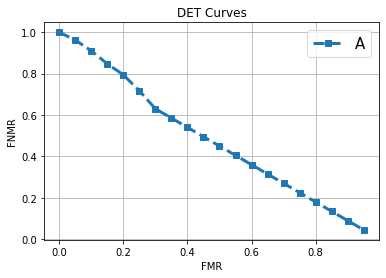

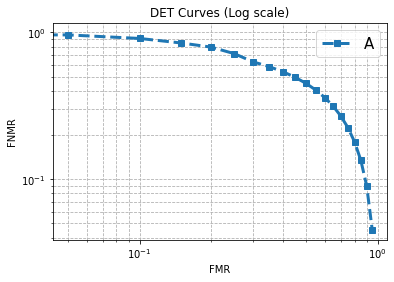

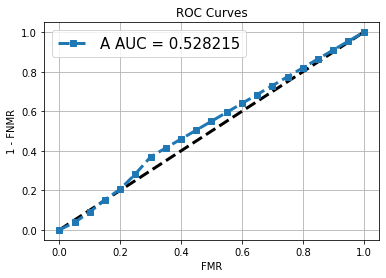

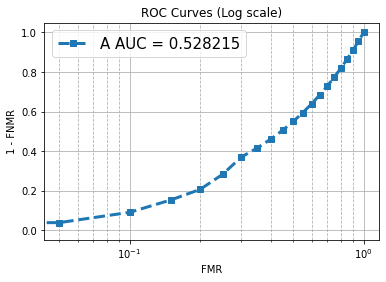

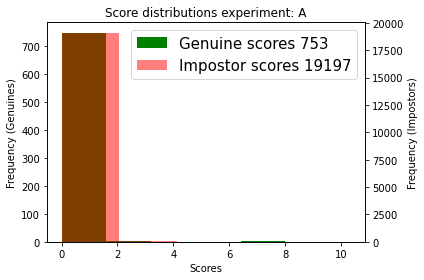

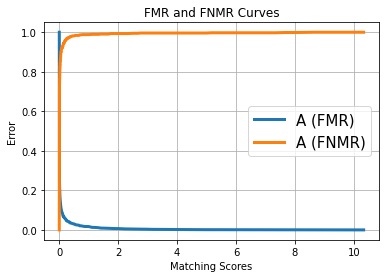

In [14]:
stat = get_eer_stats(genuine,imposter)
generate_eer_report([stat], ['A'], 'orb_report.html')
plot_eer_stats([stat], ['A'],save_plots=False,bins=5)

In [9]:
def plot_mk(stats, ids, hformat=False, bins=50,
                      lgf_size=15, save_plots=True, dpi=None,
                      save_path='', ext='.png'):

    for i, st in enumerate(stats):
        # Plotting score distributions
        title = 'Score distributions experiment: ' + ids[i]
        fig, ax1 = plt.subplots()

        ax1.grid(False)
        ax1.set_xlabel('Scores')
        ax1.set_title(title)
        ax1.set_ylabel('Frequency (Genuines)')
        # ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()
        ax2.set_ylabel('Frequency (Impostors)')

        if hformat:
            # Obtaining histogram
            m = max(st.gen_scores)
            x = np.arange(m)
            ghist = np.histogram(st.gen_scores, bins=np.arange(m + 1))[0]

            ax1.plot(x, ghist, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))

            x = np.arange(len(st.imp_scores))
            ax2.plot(x, st.imp_scores, color='r',
                     label='Impostor scores %d' % sum(st.imp_scores))
        else:
            ax1.hist(st.gen_scores, bins=bins, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))
            ax2.hist(st.imp_scores, bins=bins, alpha=0.5, color='r',
                     label='Impostor scores %d' % len(st.imp_scores))

        fig.legend(prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 1),
                   bbox_transform=ax1.transAxes)
        fig.tight_layout()

        if save_plots:
            fig_name = 'Distributions (%s)' % ids[i] + ext
            fig.savefig(join(save_path, fig_name), dpi=dpi)
            plt.close('all')
        else:
            plt.show()

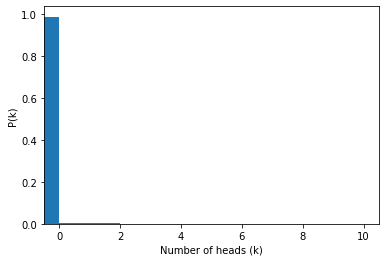

In [10]:
b = np.bincount(genuine,minlength=10)
p = b / float(b.sum())

plt.bar(np.arange(len(b)) - 0.5, p, width=1)
plt.xlim(-0.5, 10 + 0.5)
plt.xlabel("Number of heads (k)")
plt.ylabel("P(k)")

plt.show()

In [23]:
count = 0
total = 0
for i in range(length):
    total+=1
    if(float(id3[i]) >= 0.002):
        count+=1

In [24]:
print("crr ="+str(count/total))

crr =0.27418546365914787
